# add indicator

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import ta  # technical analysis library
import matplotlib.pyplot as plt

In [ ]:
file_path = r"C:\Users\amirhossein\Desktop\project of master\btcusd_1-min_data (1).csv"

# Load data
df = pd.read_csv(file_path)

# Parse timestamp
if np.issubdtype(df['Timestamp'].dtype, np.number):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
else:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df = df.set_index('Timestamp')

# Resample to 15-minute intervals
df = df.resample('15min').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
}).dropna()

df['Close'] = df['Close'].ffill()

# --- Price-based features ---
df['Return_pct'] = df['Close'].pct_change()
df['Log_return'] = np.log(df['Close'] / df['Close'].shift(1))
df['SMA_10'] = df['Close'].rolling(10).mean()
df['SMA_50'] = df['Close'].rolling(50).mean()
df['EMA_10'] = df['Close'].ewm(span=10).mean()

# --- Volume-based features ---

# --- Technical indicators (from `ta` library) ---
df['RSI'] = ta.momentum.RSIIndicator(close=df['Close']).rsi()
bb = ta.volatility.BollingerBands(close=df['Close'])
df['BB_high'] = bb.bollinger_hband()
df['BB_low'] = bb.bollinger_lband()
macd = ta.trend.MACD(close=df['Close'])
df['MACD'] = macd.macd()
df['MACD_signal'] = macd.macd_signal()
df['Stoch_%K'] = ta.momentum.StochasticOscillator(high=df['High'], low=df['Low'], close=df['Close']).stoch()
df['ATR'] = ta.volatility.AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close']).average_true_range()

# --- Statistical features ---
window = 20
df['Volatility'] = df['Log_return'].rolling(window).std()
df['Skewness'] = df['Log_return'].rolling(window).apply(skew)
df['Kurtosis'] = df['Log_return'].rolling(window).apply(kurtosis)
df['Autocorr'] = df['Log_return'].rolling(window).apply(lambda x: x.autocorr(lag=1))

# --- Time-based features ---
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek
df['Day'] = df.index.day
df['Is_weekend'] = (df['DayOfWeek'] >= 5).astype(int)

# --- Drop NaNs from feature creation ---
df = df.dropna()


In [ ]:
df

Open       High        Low      Close  Return_pct  \
Timestamp                                                                     
2012-01-01 22:15:00       4.84       4.84       4.84       4.84    0.000000   
2012-01-01 22:30:00       4.84       4.84       4.84       4.84    0.000000   
2012-01-01 22:45:00       4.84       4.84       4.84       4.84    0.000000   
2012-01-01 23:00:00       4.84       4.84       4.84       4.84    0.000000   
2012-01-01 23:15:00       4.84       4.84       4.84       4.84    0.000000   
...                        ...        ...        ...        ...         ...   
2025-05-12 23:45:00  102865.00  102964.00  102796.00  102796.00   -0.000816   
2025-05-13 00:00:00  102796.00  102796.00  102553.00  102633.00   -0.001586   
2025-05-13 00:15:00  102582.00  102660.00  102434.00  102500.00   -0.001296   
2025-05-13 00:30:00  102541.00  102565.00  102226.00  102276.00   -0.002185   
2025-05-13 00:45:00  102254.00  102278.00  102222.00  102271.00   -0.000049   

                     Log_return      SMA_10       SMA_50         EMA_10  \
Timestamp                                                                 
2012-01-01 22:15:00    0.000000       4.814       4.6268       4.797290   
2012-01-01 22:30:00    0.000000       4.840       4.6320       4.805056   
2012-01-01 22:45:00    0.000000       4.840       4.6372       4.811410   
2012-01-01 23:00:00    0.000000       4.840       4.6424       4.816608   
2012-01-01 23:15:00    0.000000       4.840       4.6476       4.820861   
...                         ...         ...          ...            ...   
2025-05-12 23:45:00   -0.000817  102778.600  102856.3800  102763.592389   
2025-05-13 00:00:00   -0.001587  102787.300  102825.7200  102739.848318   
2025-05-13 00:15:00   -0.001297  102784.700  102800.2000  102696.239533   
2025-05-13 00:30:00   -0.002188  102755.700  102766.8200  102619.832345   
2025-05-13 00:45:00   -0.000049  102706.600  102732.3200  102556.408283   

                            RSI  ...    Stoch_%K         ATR  Volatility  \
Timestamp                        ...                                       
2012-01-01 22:15:00  100.000000  ...  100.000000    0.010265    0.012347   
2012-01-01 22:30:00  100.000000  ...  100.000000    0.009532    0.012347   
2012-01-01 22:45:00  100.000000  ...  100.000000    0.008851    0.012347   
2012-01-01 23:00:00  100.000000  ...  100.000000    0.008219    0.012347   
2012-01-01 23:15:00  100.000000  ...  100.000000    0.007632    0.012347   
...                         ...  ...         ...         ...         ...   
2025-05-12 23:45:00   53.092966  ...   63.369565  302.424768    0.001678   
2025-05-13 00:00:00   49.406238  ...   35.149157  298.180142    0.001722   
2025-05-13 00:15:00   46.564971  ...   17.898833  293.024417    0.001696   
2025-05-13 00:30:00   42.166708  ...    5.512679  296.308388    0.001764   
2025-05-13 00:45:00   42.071184  ...    5.378705  279.143503    0.001666   

                     Skewness   Kurtosis  Autocorr  Hour  DayOfWeek  Day  \
Timestamp                                                                  
2012-01-01 22:15:00  4.129483  15.052632 -0.055556    22          6    1   
2012-01-01 22:30:00  4.129483  15.052632 -0.055556    22          6    1   
2012-01-01 22:45:00  4.129483  15.052632 -0.055556    22          6    1   
2012-01-01 23:00:00  4.129483  15.052632 -0.055556    23          6    1   
2012-01-01 23:15:00  4.129483  15.052632 -0.055556    23          6    1   
...                       ...        ...       ...   ...        ...  ...   
2025-05-12 23:45:00  0.113664  -0.928096  0.077970    23          0   12   
2025-05-13 00:00:00  0.278083  -0.957617  0.180257     0          1   13   
2025-05-13 00:15:00  0.304704  -0.929454  0.184104     0          1   13   
2025-05-13 00:30:00  0.227359  -0.974564  0.343109     0          1   13   
2025-05-13 00:45:00  0.359466  -0.644789  0.355584     0          1   13   

                     Is_weekend  
Timestamp 

In [ ]:
from scipy.signal import find_peaks

def extract_pivots(prices, prominence=0.01, distance=5):
    # Peaks
    peaks, _ = find_peaks(prices, prominence=prominence, distance=distance)
    # Troughs by inverting the series
    troughs, _ = find_peaks(-prices, prominence=prominence, distance=distance)
    
    # Merge and sort
    pivot_idx = np.sort(np.concatenate((peaks, troughs)))
    pivot_values = prices[pivot_idx]
    
    return pivot_idx, pivot_values

def identify_impulse_waves(pivot_idx, pivot_values, min_ratio=1.3, tolerance=0.15):
    """
    Receive a list of pivot points and return valid impulse waves 1 to 5
    """
    valid_patterns = []
    for i in range(len(pivot_idx) - 4):
        i1, i2, i3, i4, i5 = pivot_idx[i:i+5]
        p1, p2, p3, p4, p5 = pivot_values[i:i+5]

        # Overall direction (upward or downward)
        direction = 1 if p5 > p1 else -1

        # Wave lengths
        w1 = abs(p2 - p1)
        w2 = abs(p3 - p2)
        w3 = abs(p4 - p3)
        w4 = abs(p5 - p4)

        # Elliott Wave rules
        cond1 = w3 >= min_ratio * w1  # Wave 3 must be larger
        cond2 = direction * (p2 - p1) > 0  # Wave 1 is upward
        cond3 = direction * (p4 - p3) < 0  # Wave 4 is corrective
        cond4 = direction * (p5 - p1) > 0  # Wave 5 continues the trend

        if all([cond1, cond2, cond3, cond4]):
            valid_patterns.append((i1, i2, i3, i4, i5))
    return valid_patterns


def label_wave_pattern(price_series, valid_patterns):
    labels = np.zeros(len(price_series))
    for wave in valid_patterns:
        for idx, label in zip(wave, [1, 2, 3, 4, 5]):
            labels[idx] = label
    return labels


prices = df['Close'].values

# Extract peaks and troughs
pivot_idx, pivot_vals = extract_pivots(prices, prominence=0.01)

# Identify valid 1 to 5 wave patterns
valid_impulses = identify_impulse_waves(pivot_idx, prices[pivot_idx])

# Create labels
wave_labels = label_wave_pattern(prices, valid_impulses)

# Add to DataFrame
df['Wave_Label'] = wave_labels

In [ ]:
df

Open       High        Low      Close  Return_pct  \
Timestamp                                                                     
2012-01-01 22:15:00       4.84       4.84       4.84       4.84    0.000000   
2012-01-01 22:30:00       4.84       4.84       4.84       4.84    0.000000   
2012-01-01 22:45:00       4.84       4.84       4.84       4.84    0.000000   
2012-01-01 23:00:00       4.84       4.84       4.84       4.84    0.000000   
2012-01-01 23:15:00       4.84       4.84       4.84       4.84    0.000000   
...                        ...        ...        ...        ...         ...   
2025-05-12 23:45:00  102865.00  102964.00  102796.00  102796.00   -0.000816   
2025-05-13 00:00:00  102796.00  102796.00  102553.00  102633.00   -0.001586   
2025-05-13 00:15:00  102582.00  102660.00  102434.00  102500.00   -0.001296   
2025-05-13 00:30:00  102541.00  102565.00  102226.00  102276.00   -0.002185   
2025-05-13 00:45:00  102254.00  102278.00  102222.00  102271.00   -0.000049   

                     Log_return      SMA_10       SMA_50         EMA_10  \
Timestamp                                                                 
2012-01-01 22:15:00    0.000000       4.814       4.6268       4.797290   
2012-01-01 22:30:00    0.000000       4.840       4.6320       4.805056   
2012-01-01 22:45:00    0.000000       4.840       4.6372       4.811410   
2012-01-01 23:00:00    0.000000       4.840       4.6424       4.816608   
2012-01-01 23:15:00    0.000000       4.840       4.6476       4.820861   
...                         ...         ...          ...            ...   
2025-05-12 23:45:00   -0.000817  102778.600  102856.3800  102763.592389   
2025-05-13 00:00:00   -0.001587  102787.300  102825.7200  102739.848318   
2025-05-13 00:15:00   -0.001297  102784.700  102800.2000  102696.239533   
2025-05-13 00:30:00   -0.002188  102755.700  102766.8200  102619.832345   
2025-05-13 00:45:00   -0.000049  102706.600  102732.3200  102556.408283   

                            RSI  ...         ATR  Volatility  Skewness  \
Timestamp                        ...                                     
2012-01-01 22:15:00  100.000000  ...    0.010265    0.012347  4.129483   
2012-01-01 22:30:00  100.000000  ...    0.009532    0.012347  4.129483   
2012-01-01 22:45:00  100.000000  ...    0.008851    0.012347  4.129483   
2012-01-01 23:00:00  100.000000  ...    0.008219    0.012347  4.129483   
2012-01-01 23:15:00  100.000000  ...    0.007632    0.012347  4.129483   
...                         ...  ...         ...         ...       ...   
2025-05-12 23:45:00   53.092966  ...  302.424768    0.001678  0.113664   
2025-05-13 00:00:00   49.406238  ...  298.180142    0.001722  0.278083   
2025-05-13 00:15:00   46.564971  ...  293.024417    0.001696  0.304704   
2025-05-13 00:30:00   42.166708  ...  296.308388    0.001764  0.227359   
2025-05-13 00:45:00   42.071184  ...  279.143503    0.001666  0.359466   

                      Kurtosis  Autocorr  Hour  DayOfWeek  Day  Is_weekend  \
Timestamp                                                                    
2012-01-01 22:15:00  15.052632 -0.055556    22          6    1           1   
2012-01-01 22:30:00  15.052632 -0.055556    22          6    1           1   
2012-01-01 22:45:00  15.052632 -0.055556    22          6    1           1   
2012-01-01 23:00:00  15.052632 -0.055556    23          6    1           1   
2012-01-01 23:15:00  15.052632 -0.055556    23          6    1           1   
...                        ...       ...   ...        ...  ...         ...   
2025-05-12 23:45:00  -0.928096  0.077970    23          0   12           0   
2025-05-13 00:00:00  -0.957617  0.180257     0          1   13           0   
2025-05-13 00:15:00  -0.929454  0.184104     0          1   13           0   
2025-05-13 00:30:00  -0.974564  0.343109     0          1   13           0   
2025-05-13 00:45:00  -0.644789  0.355584     0          1   13           0   

                     Wave_Label  
Timestamp 

In [ ]:
def plot_wave_labels(df, price_col='Close', label_col='Wave_Label'):
    plt.figure(figsize=(15, 6))
    plt.plot(df[price_col], label='Close Price', linewidth=1.2)

    wave_colors = {
        1: 'blue',
        2: 'orange',
        3: 'green',
        4: 'red',
        5: 'purple',
    }

    for idx, row in df.iterrows():
        label = row[label_col]
        if label in wave_colors:
            plt.scatter(idx, row[price_col], color=wave_colors[label], s=60, label=f'Wave {int(label)}')
            plt.text(idx, row[price_col]*1.01, f'{int(label)}', fontsize=9, ha='center', color=wave_colors[label])

    plt.title("Elliott Wave Labeling on Price")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.grid(True)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # ÿ¨ŸÑŸà⁄Ø€åÿ±€å ÿßÿ≤ ÿ™⁄©ÿ±ÿßÿ± ÿØÿ± legend
    plt.legend(by_label.values(), by_label.keys())
    plt.tight_layout()
    plt.show()


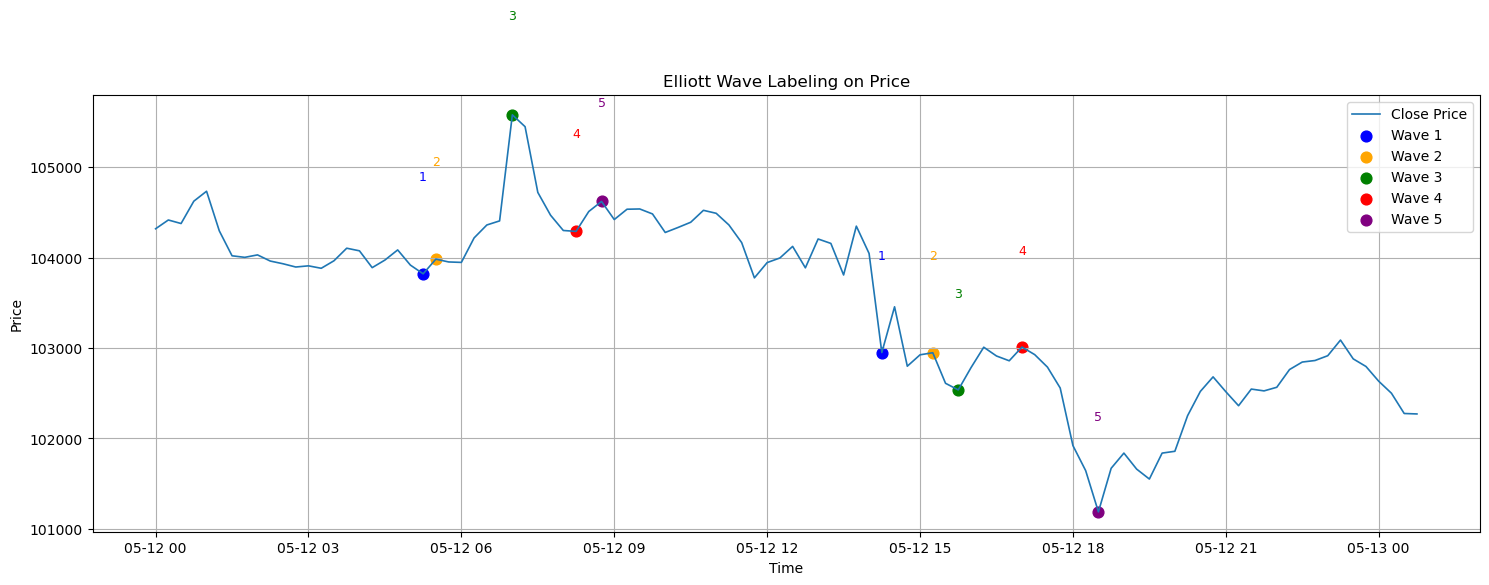

In [ ]:
plot_wave_labels(df.iloc[-100:])  

In [ ]:
# ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿßÿ∑ŸÑÿßÿπÿßÿ™ ŸÜŸÇÿßÿ∑ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåÿØÿßÿ± (ŸÖŸàÿ¨ 1 ÿ™ÿß 5)
wave_points = df[df['Wave_Label'].isin([1, 2, 3, 4, 5])].copy()

# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ÿß€åŸÜÿØ⁄©ÿ≥ ÿ≤ŸÖÿßŸÜ€å ÿ®Ÿá ÿπŸÜŸàÿßŸÜ ÿ≥ÿ™ŸàŸÜ
wave_points['Time'] = wave_points.index

# ŸÖÿ±ÿ™ÿ®‚Äåÿ≥ÿßÿ≤€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ¥ŸÖÿßÿ±Ÿá ŸÖŸàÿ¨
wave_points_sorted = wave_points[['Wave_Label', 'Time', 'Close']].sort_values(by='Wave_Label')

# ŸÜŸÖÿß€åÿ¥ ÿ¨ÿØŸàŸÑ ŸÜŸáÿß€å€å
print(wave_points_sorted)

                     Wave_Label                Time      Close
Timestamp                                                     
2012-02-17 12:45:00         1.0 2012-02-17 12:45:00       4.79
2017-09-15 18:15:00         1.0 2017-09-15 18:15:00    3553.89
2017-09-17 22:30:00         1.0 2017-09-17 22:30:00    3698.00
2017-09-18 18:45:00         1.0 2017-09-18 18:45:00    4020.00
2017-09-18 19:30:00         1.0 2017-09-18 19:30:00    4053.03
...                         ...                 ...        ...
2019-10-08 08:00:00         5.0 2019-10-08 08:00:00    8303.94
2019-10-08 19:00:00         5.0 2019-10-08 19:00:00    8216.43
2019-10-09 20:30:00         5.0 2019-10-09 20:30:00    8606.85
2019-10-10 18:30:00         5.0 2019-10-10 18:30:00    8497.67
2025-05-12 18:30:00         5.0 2025-05-12 18:30:00  101188.00

[31947 rows x 3 columns]


In [ ]:
# ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ŸÅŸÇÿ∑ ÿßŸÖŸàÿßÿ¨ 1 ÿ™ÿß 5
wave_points = df[df['Wave_Label'].isin([1, 2, 3, 4, 5])].copy()

# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ÿß€åŸÜÿØ⁄©ÿ≥ ÿ≤ŸÖÿßŸÜ€å ÿ®Ÿá ÿπŸÜŸàÿßŸÜ ÿ≥ÿ™ŸàŸÜ ŸÖÿ¨ÿ≤ÿß
wave_points['Time'] = wave_points.index

# ŸÖÿ±ÿ™ÿ®‚Äåÿ≥ÿßÿ≤€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ≤ŸÖÿßŸÜ (ŸÜŸá ÿ¥ŸÖÿßÿ±Ÿá ŸÖŸàÿ¨)
wave_points_sorted = wave_points[['Wave_Label', 'Time', 'Close']].sort_values(by='Time')

# ⁄Øÿ±ŸÅÿ™ŸÜ €≤€∞ ŸÖŸàÿ¨ ÿ¢ÿÆÿ±
last_20_waves = wave_points_sorted.tail(20).reset_index(drop=True)

# ŸÜŸÖÿß€åÿ¥
print(last_20_waves)


    Wave_Label                Time     Close
0          1.0 2025-05-11 12:00:00  104829.0
1          2.0 2025-05-11 12:30:00  104588.0
2          3.0 2025-05-11 14:15:00  103940.0
3          4.0 2025-05-11 15:00:00  104530.0
4          5.0 2025-05-11 16:15:00  104094.0
5          1.0 2025-05-11 19:00:00  104616.0
6          2.0 2025-05-11 20:15:00  104424.0
7          3.0 2025-05-11 21:00:00  104054.0
8          4.0 2025-05-11 21:45:00  104383.0
9          5.0 2025-05-11 22:30:00  103621.0
10         1.0 2025-05-12 05:15:00  103821.0
11         2.0 2025-05-12 05:30:00  103983.0
12         3.0 2025-05-12 07:00:00  105579.0
13         4.0 2025-05-12 08:15:00  104290.0
14         5.0 2025-05-12 08:45:00  104621.0
15         1.0 2025-05-12 14:15:00  102950.0
16         2.0 2025-05-12 15:15:00  102948.0
17         3.0 2025-05-12 15:45:00  102537.0
18         4.0 2025-05-12 17:00:00  103011.0
19         5.0 2025-05-12 18:30:00  101188.0


In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema

close = df['Close']

# ---------- 3. ÿ¥ŸÜÿßÿ≥ÿß€å€å ÿ≥ŸÇŸÅ Ÿà ⁄©ŸÅ ÿ®ÿß ZigZag ----------
from scipy.signal import argrelextrema

def detect_peaks(data, order=10):
    maxima = argrelextrema(data.values, np.greater_equal, order=order)[0]
    minima = argrelextrema(data.values, np.less_equal, order=order)[0]
    pivots = np.sort(np.concatenate((maxima, minima)))
    return pivots

def label_elliott_waves_strict(df, pivots):
    rows = []
    i = 0
    while i + 4 < len(pivots):
        p = pivots[i:i+5]
        prices = df['Close'].iloc[p].values

        if (
            (prices[1] < prices[0]) and
            (prices[2] < prices[1]) and
            (prices[3] > prices[2]) and
            (prices[4] < prices[3]) and
            (prices[2] < prices[0]) and
            (prices[3] < prices[1]) and
            (prices[4] < prices[2])
        ):
            for wave_num, idx in zip(range(1, 6), p):
                row = df.iloc[idx].copy()
                row['Wave_Label'] = wave_num
                rows.append(row)
            i += 5
        else:
            i += 1

    wave_df = pd.DataFrame(rows)
    wave_df.reset_index(inplace=True)  
    return wave_df

pivots = detect_peaks(df['Close'], order=10)
wave_df = label_elliott_waves_strict(df, pivots)
print(wave_df.tail(20))


                   index     Open     High      Low    Close  Return_pct  \
1245 2025-03-06 10:15:00  90988.0  91649.0  90943.0  91624.0    0.007134   
1246 2025-03-06 15:30:00  90831.0  91442.0  90662.0  91205.0    0.003620   
1247 2025-03-06 19:15:00  88299.0  88333.0  88051.0  88062.0   -0.002695   
1248 2025-03-06 22:00:00  89886.0  90777.0  89886.0  90477.0    0.006698   
1249 2025-03-07 00:45:00  85936.0  85936.0  84713.0  85493.0   -0.005410   
1250 2025-03-21 01:45:00  84519.0  84738.0  84462.0  84735.0    0.002568   
1251 2025-03-21 04:30:00  84646.0  84743.0  84644.0  84706.0    0.000673   
1252 2025-03-21 07:30:00  84040.0  84040.0  83713.0  83740.0   -0.003582   
1253 2025-03-21 12:15:00  84179.0  84297.0  84113.0  84220.0    0.000808   
1254 2025-03-21 12:45:00  83758.0  83862.0  83358.0  83435.0   -0.003844   
1255 2025-03-27 21:30:00  87372.0  87702.0  87372.0  87617.0    0.002804   
1256 2025-03-28 01:30:00  87148.0  87481.0  87108.0  87481.0    0.003821   
1257 2025-03

In [ ]:
wave_df

index      Open      High       Low     Close  Return_pct  \
0    2012-07-03 14:00:00      6.65      6.65      6.65      6.65    0.000000   
1    2012-07-03 16:45:00      6.64      6.64      6.64      6.64    0.000000   
2    2012-07-03 18:15:00      6.48      6.48      6.45      6.45   -0.006163   
3    2012-07-03 22:00:00      6.51      6.51      6.51      6.51    0.000000   
4    2012-07-03 22:15:00      6.51      6.51      6.40      6.40   -0.016897   
...                  ...       ...       ...       ...       ...         ...   
1260 2025-04-06 08:15:00  82854.00  82870.00  82714.00  82715.00   -0.001678   
1261 2025-04-06 13:45:00  82460.00  82460.00  82219.00  82276.00   -0.002243   
1262 2025-04-06 23:15:00  77692.00  77747.00  77098.00  77373.00   -0.003824   
1263 2025-04-07 01:45:00  78658.00  79175.00  78633.00  79094.00    0.005530   
1264 2025-04-07 06:45:00  75008.00  75291.00  74483.00  74724.00   -0.003281   

      Log_return     SMA_10      SMA_50        EMA_10  ...         ATR  \
0       0.000000      6.643      6.6068      6.639861  ...    0.013891   
1       0.000000      6.617      6.6164      6.627263  ...    0.014618   
2      -0.006182      6.557      6.6038      6.535030  ...    0.027158   
3       0.000000      6.505      6.5760      6.509502  ...    0.017395   
4      -0.017041      6.494      6.5722      6.489593  ...    0.024009   
...          ...        ...         ...           ...  ...         ...   
1260   -0.001679  83086.100  83239.8000  83036.459553  ...  123.625963   
1261   -0.002246  82652.500  83053.0200  82602.291725  ...  157.586177   
1262   -0.003831  78541.900  80883.8000  78369.830401  ...  575.574059   
1263    0.005515  78383.000  80015.6600  78558.092008  ...  626.837683   
1264   -0.003287  76384.900  78127.3400  76210.740369  ...  634.743492   

      Volatility  Skewness  Kurtosis  Autocorr  Hour  DayOfWeek  Day  \
0       0.004019  0.273633  3.565590 -0.334777  14.0        1.0  3.0   
1       0.004591  0.168926  1.463570 -0.389049  16.0        1.0  3.0   
2       0.004979 -1.119646  3.142894 -0.144624  18.0        1.0  3.0   
3       0.004150  0.757154  1.419127 -0.235330  22.0        1.0  3.0   
4       0.005610 -0.695434  2.294619 -0.180474  22.0        1.0  3.0   
...          ...       ...       ...       ...   ...        ...  ...   
1260    0.001041 -0.412977 -1.014341 -0.034148   8.0        6.0  6.0   
1261    0.001295  0.028050 -0.189389 -0.203745  13.0        6.0  6.0   
1262    0.003559 -0.217465  0.024683 -0.006063  23.0        6.0  6.0   
1263    0.006120 -0.002336 -0.422274 -0.292202   1.0        0.0  7.0   
1264    0.004832 -0.810342 -0.156918 -0.142826   6.0        0.0  7.0   

      Is_weekend  Wave_Label  
0            0.0         1.0  
1            0.0         2.0  
2            0.0         3.0  
3            0.0         4.0  
4            0.0         5.0  
...          ...         ...  
1260         1.0         1.0  
1261         1.0         2.0  
1262         1.0         3.0  
1263         0.0         4.0  
1264         0.0         5.0  

[1265 rows x 26 columns]

In [ ]:
def detect_impulse_waves(df, distance=6):
    price_series = df['Close']
    
    # €åÿßŸÅÿ™ŸÜ ŸÖ€åŸÜ€åŸÖŸÖ‚ÄåŸáÿß Ÿà ŸÖÿß⁄©ÿ≤€åŸÖŸÖ‚ÄåŸáÿß
    local_min = argrelextrema(price_series.values, np.less_equal, order=distance)[0]
    local_max = argrelextrema(price_series.values, np.greater_equal, order=distance)[0]
    extrema_indices = np.sort(np.concatenate((local_min, local_max)))

    selected_rows = []
    wave_labels = []
    idx = 0

    while idx + 4 < len(extrema_indices):
        i1, i2, i3, i4, i5 = extrema_indices[idx:idx+5]
        p1, p2, p3, p4, p5 = price_series.iloc[[i1, i2, i3, i4, i5]]

        # ŸÖŸàÿ¨ ŸÜÿ≤ŸàŸÑ€å
        if (
            p2 > p1 and
            p3 < p2 and (p1 - p3) > (p1 - p2) and
            p4 > p3 and p4 < p2 and
            p5 < p4 and p5 < p3
        ):
            for wave_num, i in zip([1, 2, 3, 4, 5], [i1, i2, i3, i4, i5]):
                row = df.iloc[i].copy()
                row['Wave_Label'] = wave_num
                selected_rows.append(row)
            idx += 5
            continue

        # ŸÖŸàÿ¨ ÿµÿπŸàÿØ€å
        if (
            p2 < p1 and
            p3 > p2 and (p3 - p1) > (p2 - p1) and
            p4 < p3 and p4 > p2 and
            p5 > p4 and p5 > p3
        ):
            for wave_num, i in zip([1, 2, 3, 4, 5], [i1, i2, i3, i4, i5]):
                row = df.iloc[i].copy()
                row['Wave_Label'] = wave_num
                selected_rows.append(row)
            idx += 5
            continue

        idx += 1

    result = pd.DataFrame(selected_rows)
    result.reset_index(inplace=True)  # ÿßÿÆÿ™€åÿßÿ±€å: ÿ®ÿ±ÿß€å ÿ≠ŸÅÿ∏ ÿß€åŸÜÿØ⁄©ÿ≥ ÿ≤ŸÖÿßŸÜ€å

    return result


In [ ]:
print(wave_df.columns)


Index(['index', 'Open', 'High', 'Low', 'Close', 'Return_pct', 'Log_return',
       'SMA_10', 'SMA_50', 'EMA_10', 'RSI', 'BB_high', 'BB_low', 'MACD',
       'MACD_signal', 'Stoch_%K', 'ATR', 'Volatility', 'Skewness', 'Kurtosis',
       'Autocorr', 'Hour', 'DayOfWeek', 'Day', 'Is_weekend', 'Wave_Label'],
      dtype='object')


C:\Users\amirhossein\AppData\Local\Temp\ipykernel_14380\2449176248.py:22: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\amirhossein\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


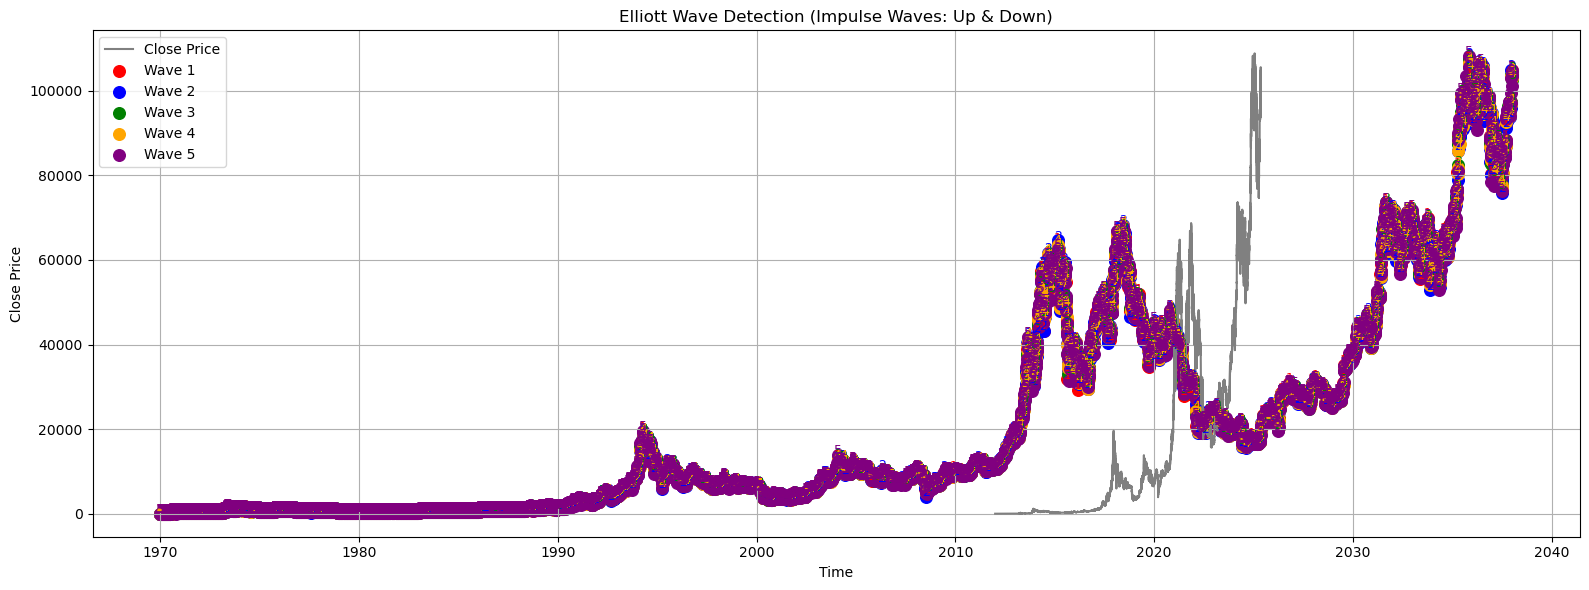

In [ ]:

wave_df = detect_impulse_waves(df, distance=6)

In [ ]:
last_20_waves = wave_df.tail(20)
print(last_20_waves)


                    index      Open      High       Low     Close  Return_pct  \
24825 2025-05-10 20:45:00  103304.0  103330.0  103169.0  103201.0   -0.000997   
24826 2025-05-10 23:15:00  103982.0  104985.0  103982.0  104857.0    0.008425   
24827 2025-05-11 02:45:00  104061.0  104134.0  103489.0  103763.0   -0.002864   
24828 2025-05-11 04:00:00  104010.0  104400.0  104010.0  104330.0    0.002739   
24829 2025-05-11 07:45:00  103446.0  103606.0  103369.0  103403.0   -0.000725   
24830 2025-05-11 12:00:00  104681.0  104884.0  104643.0  104829.0    0.001576   
24831 2025-05-11 14:15:00  103974.0  104080.0  103832.0  103940.0   -0.000337   
24832 2025-05-11 15:00:00  104182.0  104569.0  104116.0  104530.0    0.003225   
24833 2025-05-11 18:00:00  104063.0  104124.0  103918.0  103953.0   -0.000932   
24834 2025-05-11 19:00:00  104564.0  104681.0  104457.0  104616.0    0.000497   
24835 2025-05-11 22:30:00  103973.0  104053.0  103621.0  103621.0   -0.003385   
24836 2025-05-12 01:00:00  1

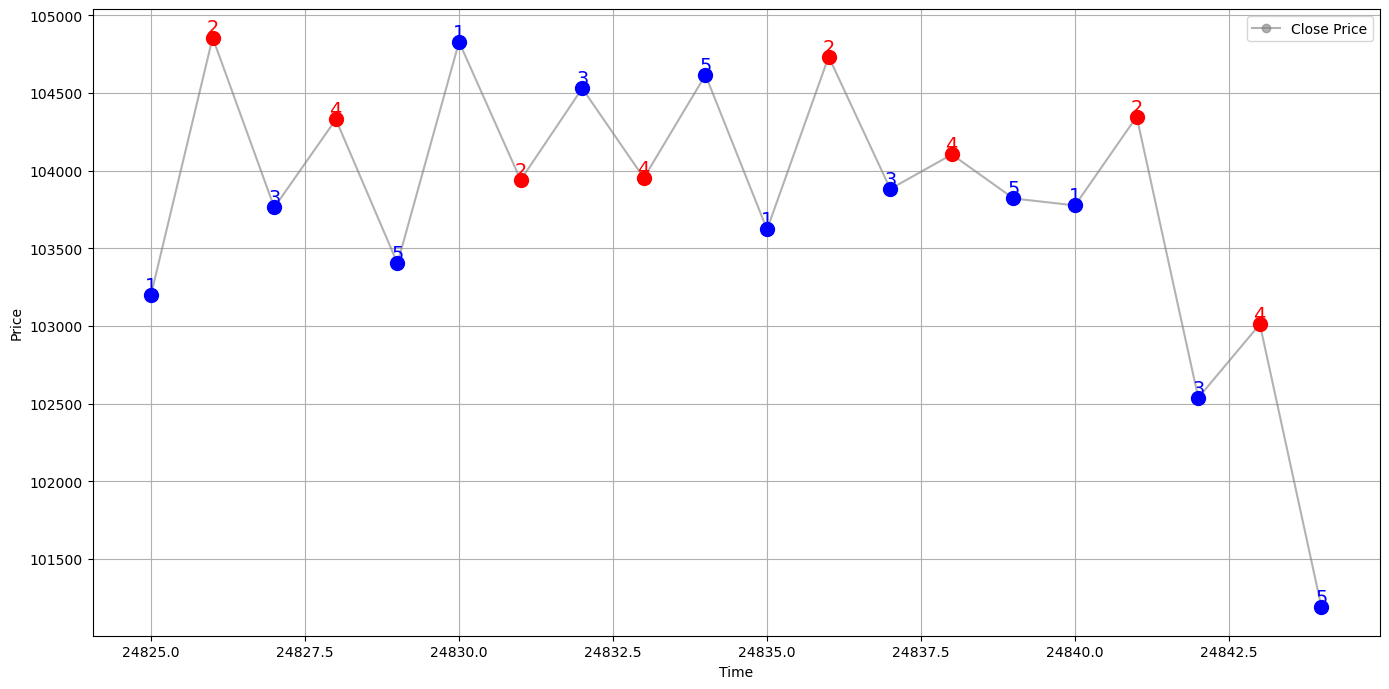

In [ ]:
last_20 = wave_df.tail(20)

plt.figure(figsize=(14, 7))
plt.plot(last_20.index, last_20['Close'], label='Close Price', color='gray', alpha=0.6, marker='o')

for i, row in last_20.iterrows():
    label = row['Wave_Label']
    time = row.name  # ‚Üê ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ index ÿ®Ÿá ÿ¨ÿß€å ÿ≥ÿ™ŸàŸÜ Time
    price = row['Close']

    if label in [1, 3, 5]:
        color = 'blue'
    elif label in [2, 4]:
        color = 'red'
    else:
        color = 'green'

    plt.scatter(time, price, color=color, s=100, zorder=5)
    plt.text(time, price, str(int(label)), fontsize=14, ha='center', va='bottom', color=color)

plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# ⁄Øÿ±ŸÅÿ™ŸÜ 20 ŸÖŸàÿ¨ ÿ¢ÿÆÿ± (ŸÖÿ´ŸÑ ŸÇÿ®ŸÑ)
last_20 = wave_df.loc[26430:26449].copy()

# ⁄ÜÿßŸæ ÿ¨ÿ≤€å€åÿßÿ™ Ÿáÿ± ŸÖŸàÿ¨ ÿ®Ÿá ÿµŸàÿ±ÿ™ ÿÆÿ∑ ÿ®Ÿá ÿÆÿ∑
for idx, row in last_20.iterrows():
    print(f"Wave_Label: {int(row['Wave_Label'])}, Time: {row['Time']}, Close: {row['Close']:.2f}")


In [ ]:
df

Open       High        Low      Close  Return_pct  \
Timestamp                                                                     
2012-01-01 22:15:00       4.84       4.84       4.84       4.84    0.000000   
2012-01-01 22:30:00       4.84       4.84       4.84       4.84    0.000000   
2012-01-01 22:45:00       4.84       4.84       4.84       4.84    0.000000   
2012-01-01 23:00:00       4.84       4.84       4.84       4.84    0.000000   
2012-01-01 23:15:00       4.84       4.84       4.84       4.84    0.000000   
...                        ...        ...        ...        ...         ...   
2025-05-12 23:45:00  102865.00  102964.00  102796.00  102796.00   -0.000816   
2025-05-13 00:00:00  102796.00  102796.00  102553.00  102633.00   -0.001586   
2025-05-13 00:15:00  102582.00  102660.00  102434.00  102500.00   -0.001296   
2025-05-13 00:30:00  102541.00  102565.00  102226.00  102276.00   -0.002185   
2025-05-13 00:45:00  102254.00  102278.00  102222.00  102271.00   -0.000049   

                     Log_return      SMA_10       SMA_50         EMA_10  \
Timestamp                                                                 
2012-01-01 22:15:00    0.000000       4.814       4.6268       4.797290   
2012-01-01 22:30:00    0.000000       4.840       4.6320       4.805056   
2012-01-01 22:45:00    0.000000       4.840       4.6372       4.811410   
2012-01-01 23:00:00    0.000000       4.840       4.6424       4.816608   
2012-01-01 23:15:00    0.000000       4.840       4.6476       4.820861   
...                         ...         ...          ...            ...   
2025-05-12 23:45:00   -0.000817  102778.600  102856.3800  102763.592389   
2025-05-13 00:00:00   -0.001587  102787.300  102825.7200  102739.848318   
2025-05-13 00:15:00   -0.001297  102784.700  102800.2000  102696.239533   
2025-05-13 00:30:00   -0.002188  102755.700  102766.8200  102619.832345   
2025-05-13 00:45:00   -0.000049  102706.600  102732.3200  102556.408283   

                            RSI  ...         ATR  Volatility  Skewness  \
Timestamp                        ...                                     
2012-01-01 22:15:00  100.000000  ...    0.010265    0.012347  4.129483   
2012-01-01 22:30:00  100.000000  ...    0.009532    0.012347  4.129483   
2012-01-01 22:45:00  100.000000  ...    0.008851    0.012347  4.129483   
2012-01-01 23:00:00  100.000000  ...    0.008219    0.012347  4.129483   
2012-01-01 23:15:00  100.000000  ...    0.007632    0.012347  4.129483   
...                         ...  ...         ...         ...       ...   
2025-05-12 23:45:00   53.092966  ...  302.424768    0.001678  0.113664   
2025-05-13 00:00:00   49.406238  ...  298.180142    0.001722  0.278083   
2025-05-13 00:15:00   46.564971  ...  293.024417    0.001696  0.304704   
2025-05-13 00:30:00   42.166708  ...  296.308388    0.001764  0.227359   
2025-05-13 00:45:00   42.071184  ...  279.143503    0.001666  0.359466   

                      Kurtosis  Autocorr  Hour  DayOfWeek  Day  Is_weekend  \
Timestamp                                                                    
2012-01-01 22:15:00  15.052632 -0.055556    22          6    1           1   
2012-01-01 22:30:00  15.052632 -0.055556    22          6    1           1   
2012-01-01 22:45:00  15.052632 -0.055556    22          6    1           1   
2012-01-01 23:00:00  15.052632 -0.055556    23          6    1           1   
2012-01-01 23:15:00  15.052632 -0.055556    23          6    1           1   
...                        ...       ...   ...        ...  ...         ...   
2025-05-12 23:45:00  -0.928096  0.077970    23          0   12           0   
2025-05-13 00:00:00  -0.957617  0.180257     0          1   13           0   
2025-05-13 00:15:00  -0.929454  0.184104     0          1   13           0   
2025-05-13 00:30:00  -0.974564  0.343109     0          1   13           0   
2025-05-13 00:45:00  -0.644789  0.355584     0          1   13           0   

                     Wave_Label  
Timestamp 

In [ ]:
import pandas as pd

wave_df['Time'] = wave_df.index


# ŸÅÿ±ÿ∂ ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ df ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿßÿµŸÑ€å ÿ¥ŸÖÿßÿ≥ÿ™
# ÿßÿ®ÿ™ÿØÿß 20 ÿ™ÿß€å ÿ¢ÿÆÿ± ÿ±Ÿà ÿ®ÿ±ŸÖ€å‚ÄåÿØÿßÿ±€åŸÖ
df_last_20 = wave_df.tail(20).reset_index(drop=True)

# ⁄Ü⁄© 1: ÿ™ÿ±ÿ™€åÿ® ŸÖŸàÿ¨‚ÄåŸáÿß Ÿà ÿ≤ŸÖÿßŸÜ
correct_order = True
for i in range(len(df_last_20)-1):
    current_wave = df_last_20.loc[i, 'Wave_Label']
    next_wave = df_last_20.loc[i+1, 'Wave_Label']
    current_time = df_last_20.loc[i, 'Time']
    next_time = df_last_20.loc[i+1, 'Time']

    expected_next_wave = 1 if current_wave == 5 else current_wave + 1

    if next_wave != expected_next_wave:
        print(f"ÿÆÿ∑ÿß: ÿ™ÿ±ÿ™€åÿ® ŸÖŸàÿ¨‚ÄåŸáÿß ÿ±ÿπÿß€åÿ™ ŸÜÿ¥ÿØŸá ÿ®€åŸÜ index {i} Ÿà {i+1} ({current_wave} -> {next_wave})")
        correct_order = False

    if next_time <= current_time:
        print(f"ÿÆÿ∑ÿß: ÿ≤ŸÖÿßŸÜ ⁄©ÿßŸáÿ¥ €åÿßŸÅÿ™Ÿá ÿ®€åŸÜ index {i} Ÿà {i+1} ({current_time} -> {next_time})")
        correct_order = False

if correct_order:
    print("ÿ™ÿ±ÿ™€åÿ® ÿ≤ŸÖÿßŸÜ€å Ÿà ÿπÿØÿØ€å ŸÖŸàÿ¨‚ÄåŸáÿß ÿµÿ≠€åÿ≠ ÿßÿ≥ÿ™.")

# ⁄Ü⁄© 2: ŸÖŸÜÿ∑ŸÇ ŸÇ€åŸÖÿ™‚ÄåŸáÿß (ŸÖŸàÿ¨ ÿµÿπŸàÿØ€å Ÿà ÿßÿµŸÑÿßÿ≠€å)
price_logic_ok = True
for i in range(len(df_last_20)-1):
    current_wave = df_last_20.loc[i, 'Wave_Label']
    current_price = df_last_20.loc[i, 'Close']
    next_price = df_last_20.loc[i+1, 'Close']

    if current_wave in [1, 3, 5]:  # ŸÖŸàÿ¨ ÿµÿπŸàÿØ€å ÿ®ÿß€åÿØ ŸÇ€åŸÖÿ™ ÿßŸÅÿ≤ÿß€åÿ¥€å ÿØÿßÿ¥ÿ™Ÿá ÿ®ÿßÿ¥ÿØ
        if next_price <= current_price:
            print(f"ÿÆÿ∑ÿß: ŸÇ€åŸÖÿ™ ŸÖŸàÿ¨ ÿµÿπŸàÿØ€å ÿ®ÿπÿØ€å ⁄©ÿßŸáÿ¥ €åÿßŸÅÿ™Ÿá ÿ®€åŸÜ index {i} Ÿà {i+1} ({current_price} -> {next_price})")
            price_logic_ok = False
    elif current_wave in [2, 4]:  # ŸÖŸàÿ¨ ÿßÿµŸÑÿßÿ≠€å ÿ®ÿß€åÿØ ŸÇ€åŸÖÿ™ ⁄©ÿßŸáÿ¥€å ÿØÿßÿ¥ÿ™Ÿá ÿ®ÿßÿ¥ÿØ
        if next_price >= current_price:
            print(f"ÿÆÿ∑ÿß: ŸÇ€åŸÖÿ™ ŸÖŸàÿ¨ ÿßÿµŸÑÿßÿ≠€å ÿ®ÿπÿØ€å ÿßŸÅÿ≤ÿß€åÿ¥ €åÿßŸÅÿ™Ÿá ÿ®€åŸÜ index {i} Ÿà {i+1} ({current_price} -> {next_price})")
            price_logic_ok = False

if price_logic_ok:
    print("ŸÇŸàÿßŸÜ€åŸÜ ŸÇ€åŸÖÿ™ ÿ®ÿ±ÿß€å ÿßŸÖŸàÿßÿ¨ ÿ±ÿπÿß€åÿ™ ÿ¥ÿØŸá‚ÄåÿßŸÜÿØ.")


ÿ™ÿ±ÿ™€åÿ® ÿ≤ŸÖÿßŸÜ€å Ÿà ÿπÿØÿØ€å ŸÖŸàÿ¨‚ÄåŸáÿß ÿµÿ≠€åÿ≠ ÿßÿ≥ÿ™.
ÿÆÿ∑ÿß: ŸÇ€åŸÖÿ™ ŸÖŸàÿ¨ ÿµÿπŸàÿØ€å ÿ®ÿπÿØ€å ⁄©ÿßŸáÿ¥ €åÿßŸÅÿ™Ÿá ÿ®€åŸÜ index 5 Ÿà 6 (104829.0 -> 103940.0)
ÿÆÿ∑ÿß: ŸÇ€åŸÖÿ™ ŸÖŸàÿ¨ ÿßÿµŸÑÿßÿ≠€å ÿ®ÿπÿØ€å ÿßŸÅÿ≤ÿß€åÿ¥ €åÿßŸÅÿ™Ÿá ÿ®€åŸÜ index 6 Ÿà 7 (103940.0 -> 104530.0)
ÿÆÿ∑ÿß: ŸÇ€åŸÖÿ™ ŸÖŸàÿ¨ ÿµÿπŸàÿØ€å ÿ®ÿπÿØ€å ⁄©ÿßŸáÿ¥ €åÿßŸÅÿ™Ÿá ÿ®€åŸÜ index 7 Ÿà 8 (104530.0 -> 103953.0)
ÿÆÿ∑ÿß: ŸÇ€åŸÖÿ™ ŸÖŸàÿ¨ ÿßÿµŸÑÿßÿ≠€å ÿ®ÿπÿØ€å ÿßŸÅÿ≤ÿß€åÿ¥ €åÿßŸÅÿ™Ÿá ÿ®€åŸÜ index 8 Ÿà 9 (103953.0 -> 104616.0)
ÿÆÿ∑ÿß: ŸÇ€åŸÖÿ™ ŸÖŸàÿ¨ ÿµÿπŸàÿØ€å ÿ®ÿπÿØ€å ⁄©ÿßŸáÿ¥ €åÿßŸÅÿ™Ÿá ÿ®€åŸÜ index 9 Ÿà 10 (104616.0 -> 103621.0)
ÿÆÿ∑ÿß: ŸÇ€åŸÖÿ™ ŸÖŸàÿ¨ ÿµÿπŸàÿØ€å ÿ®ÿπÿØ€å ⁄©ÿßŸáÿ¥ €åÿßŸÅÿ™Ÿá ÿ®€åŸÜ index 14 Ÿà 15 (103821.0 -> 103776.0)


In [ ]:
wave_df

index       Open       High        Low      Close  \
0     2012-06-15 14:15:00       5.91       5.93       5.88       5.93   
1     2012-06-15 15:15:00       5.89       5.89       5.62       5.69   
2     2012-06-15 22:45:00       6.08       6.09       6.08       6.09   
3     2012-06-16 00:00:00       6.08       6.08       6.05       6.05   
4     2012-06-16 03:30:00       6.24       6.42       6.24       6.42   
...                   ...        ...        ...        ...        ...   
24840 2025-05-12 11:45:00  104166.00  104245.00  103645.00  103776.00   
24841 2025-05-12 13:45:00  103832.00  104618.00  103805.00  104348.00   
24842 2025-05-12 15:45:00  102610.00  102706.00  102414.00  102537.00   
24843 2025-05-12 17:00:00  102859.00  103095.00  102814.00  103011.00   
24844 2025-05-12 18:30:00  101644.00  101741.00  101099.00  101188.00   

       Return_pct  Log_return      SMA_10       SMA_50         EMA_10  ...  \
0        0.003384    0.003378       5.876       5.8830       5.884825  ...   
1       -0.033956   -0.034546       5.851       5.8764       5.831069  ...   
2        0.001645    0.001643       6.037       5.9078       6.041051  ...   
3       -0.004934   -0.004946       6.075       5.9282       6.063293  ...   
4        0.028846    0.028438       6.192       6.0122       6.217300  ...   
...           ...         ...         ...          ...            ...  ...   
24840   -0.003744   -0.003751  104333.900  104269.3000  104277.628141  ...   
24841    0.005202    0.005188  104041.300  104220.6800  104126.472783  ...   
24842   -0.000711   -0.000712  103242.700  104073.4200  103128.190693  ...   
24843    0.001478    0.001477  102839.300  103964.7800  103000.530566  ...   
24844   -0.004486   -0.004496  102481.800  103751.2200  102271.583311  ...   

       Volatility  Skewness  Kurtosis  Autocorr  Hour  DayOfWeek   Day  \
0        0.003448  0.076885  2.027365  0.071923  14.0        4.0  15.0   
1        0.011677 -0.878038  2.924000 -0.659349  15.0        4.0  15.0   
2        0.002651  0.403568 -0.828664 -0.393653  22.0        4.0  15.0   
3        0.002821  0.302507  0.046623 -0.247430   0.0        5.0  16.0   
4        0.007492  2.533508  5.681345 -0.128118   3.0        5.0  16.0   
...           ...       ...       ...       ...   ...        ...   ...   
24840    0.003378  1.651962  5.295291  0.170948  11.0        0.0  12.0   
24841    0.002145  0.476048  0.291614 -0.342129  13.0        0.0  12.0   
24842    0.003672 -0.619216  0.828917 -0.444649  15.0        0.0  12.0   
24843    0.003718 -0.926763  1.091207 -0.399466  17.0        0.0  12.0   
24844    0.003840 -0.449831  0.202133 -0.238704  18.0        0.0  12.0   

       Is_weekend  Wave_Label   Time  
0             0.0         1.0      0  
1             0.0         2.0      1  
2             0.0         3.0      2  
3             1.0         4.0      3  
4             1.0         5.0      4  
...           ...         ...    ...  
24840         0.0         1.0  24840  
24841         0.0         2.0  24841  
24842         0.0         3.0  24842  
24843         0.0         4.0  24843  
24844         0.0         5.0  24844  

[24845 rows x 27 columns]

In [ ]:
wave_df.columns

Index(['index', 'Open', 'High', 'Low', 'Close', 'Return_pct', 'Log_return',
       'SMA_10', 'SMA_50', 'EMA_10', 'RSI', 'BB_high', 'BB_low', 'MACD',
       'MACD_signal', 'Stoch_%K', 'ATR', 'Volatility', 'Skewness', 'Kurtosis',
       'Autocorr', 'Hour', 'DayOfWeek', 'Day', 'Is_weekend', 'Wave_Label',
       'Time'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# ÿ≠ÿ∞ŸÅ ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß€å ÿ∫€åÿ±ŸÖŸÅ€åÿØ ÿßÿ≤ ŸÅ€å⁄Üÿ±Ÿáÿß
feature_cols = wave_df.drop(columns=['index', 'Time', 'Wave_Label'], errors='ignore').columns

# ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ŸÅ€å⁄Üÿ±Ÿáÿß Ÿà ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€å
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(wave_df[feature_cols])

# Ÿæÿßÿ±ÿßŸÖÿ™ÿ± ÿ∑ŸàŸÑ ÿØŸÜÿ®ÿßŸÑŸá
SEQ_LEN = 90

# ÿ≥ÿßÿÆÿ™ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿØŸÜÿ®ÿßŸÑŸá‚ÄåÿØÿßÿ± ÿ®ÿ±ÿß€å LSTM
X, y = [], []
for i in range(SEQ_LEN, len(features_scaled)):
    X.append(features_scaled[i-SEQ_LEN:i])
    y.append(wave_df['Wave_Label'].iloc[i])

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (24755, 90, 24)
y shape: (24755,)


In [ ]:
import pandas as pd
import numpy as np

df = wave_df.copy()

# ÿ™ÿ®ÿØ€åŸÑ ŸÖÿ∑ŸÖÿ¶ŸÜ ÿ≥ÿ™ŸàŸÜ ÿ≤ŸÖÿßŸÜ
df['Time'] = pd.to_datetime(df['Time'])

# ÿ≥ÿßÿÆÿ™ ÿ≥ÿ™ŸàŸÜ ŸÅÿπŸÑ€å ŸÖŸàÿ¨
df['Current_Wave_Label'] = df['Wave_Label']

# ÿ≥ÿ™ŸàŸÜ ŸÜŸàÿπ ŸÜŸÇÿ∑Ÿá‚Äå€å ÿ®ÿπÿØ€å
def next_peak_valley(wave_list):
    result = []
    for i in range(len(wave_list) - 1):
        next_wave = wave_list[i+1]
        if next_wave in [1, 3, 5]:
            result.append("peak")
        elif next_wave in [2, 4]:
            result.append("valley")
        else:
            result.append("unknown")
    result.append("unknown")
    return result

df['Next_Peak_Valley'] = next_peak_valley(df['Wave_Label'].tolist())

# ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿ≥ÿßÿπÿ™ ÿ™ÿß Ÿæÿß€åÿßŸÜ ŸÖŸàÿ¨ ÿ®ÿπÿØ€å ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ datetime
next_wave_end_hours = []

for i in range(len(df)):
    current_time = df.loc[i, 'Time']
    # €åÿßŸÅÿ™ŸÜ ÿßŸàŸÑ€åŸÜ ŸÖŸàÿ¨ 5 ÿ®ÿπÿØ ÿßÿ≤ i
    next_5 = df[(df.index > i) & (df['Wave_Label'] == 5)]
    if not next_5.empty:
        next_5_time = pd.to_datetime(next_5.iloc[0]['Time'])
        delta_hours = (next_5_time - current_time).total_seconds() / 3600
        next_wave_end_hours.append(delta_hours)
    else:
        next_wave_end_hours.append(np.nan)

df['Hours_to_Next_Wave_End'] = next_wave_end_hours

# ÿ≠ÿ∞ŸÅ ÿ≥ÿ∑ÿ±Ÿáÿß€å ÿ∫€åÿ±ŸÖÿπÿ™ÿ®ÿ±
df = df[df['Next_Peak_Valley'] != 'unknown']
df = df.dropna(subset=['Hours_to_Next_Wave_End'])
df.reset_index(drop=True, inplace=True)

# ÿ®ÿ±ÿ±ÿ≥€å ÿÆÿ±Ÿàÿ¨€å
print(df[['Time', 'Wave_Label', 'Current_Wave_Label', 'Next_Peak_Valley', 'Hours_to_Next_Wave_End']].head())


                           Time  Wave_Label  Current_Wave_Label  \
0 1970-01-01 00:00:00.000000000         1.0                 1.0   
1 1970-01-01 00:00:00.000000001         2.0                 2.0   
2 1970-01-01 00:00:00.000000002         3.0                 3.0   
3 1970-01-01 00:00:00.000000003         4.0                 4.0   
4 1970-01-01 00:00:00.000000004         5.0                 5.0   

  Next_Peak_Valley  Hours_to_Next_Wave_End  
0           valley                     0.0  
1             peak                     0.0  
2           valley                     0.0  
3             peak                     0.0  
4             peak                     0.0  


In [ ]:
import pandas as pd
import numpy as np

df = wave_df.copy()

# ÿ™ÿ®ÿØ€åŸÑ ÿ≤ŸÖÿßŸÜ ÿ®Ÿá datetime ÿ®ÿ±ÿß€å ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿØŸÇ€åŸÇ‚Äåÿ™ÿ±
df['Time'] = pd.to_datetime(df['Time'])

# ÿ≥ÿßÿÆÿ™ ÿ≥ÿ™ŸàŸÜ 1: ŸÖŸàÿ¨ ŸÅÿπŸÑ€å (ŸáÿØŸÅ ŸÖÿ≥ÿ™ŸÇ€åŸÖ)
df['Current_Wave_Label'] = df['Wave_Label']

# ÿ≥ÿßÿÆÿ™ ÿ≥ÿ™ŸàŸÜ 2: ŸÜŸàÿπ ŸÇŸÑŸá €åÿß ÿØÿ±Ÿá ÿ®ÿπÿØ€å (ÿß⁄Øÿ± ŸÖŸàÿ¨ ÿ®ÿπÿØ€å 5 ÿ®ÿßÿ¥ÿØ €åÿπŸÜ€å ÿØÿ±Ÿáÿå ÿß⁄Øÿ± 3 ÿ®ÿßÿ¥ÿØ €åÿπŸÜ€å ŸÇŸÑŸá Ÿà ÿ∫€åÿ±Ÿá)
def next_peak_valley(wave_list):
    result = []
    for i in range(len(wave_list) - 1):
        next_wave = wave_list[i+1]
        if next_wave in [1, 3, 5]:
            result.append("peak")  # ŸÇŸÑŸá
        elif next_wave in [2, 4]:
            result.append("valley")  # ÿØÿ±Ÿá
        else:
            result.append("unknown")
    result.append("unknown")  # ÿ®ÿ±ÿß€å ÿ¢ÿÆÿ±€åŸÜ ŸÖŸÇÿØÿßÿ±ÿå Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ŸÜÿØÿßÿ±€åŸÖ
    return result

df['Next_Peak_Valley'] = next_peak_valley(df['Wave_Label'].tolist())

# ÿ≥ÿßÿÆÿ™ ÿ≥ÿ™ŸàŸÜ 3: ÿ≤ŸÖÿßŸÜ ÿ®ÿßŸÇ€å‚ÄåŸÖÿßŸÜÿØŸá ÿ™ÿß Ÿæÿß€åÿßŸÜ ŸÖŸàÿ¨ ÿ®ÿπÿØ€å (ÿ®Ÿá ÿ≥ÿßÿπÿ™)
next_wave_end_time = df.groupby((df['Wave_Label'] == 5).cumsum())['Time'].transform('max')
df['Hours_to_Next_Wave_End'] = (next_wave_end_time - df['Time']).dt.total_seconds() / 3600.0

# ÿ≠ÿ∞ŸÅ ÿ≥ÿ∑ÿ±Ÿáÿß€å ÿ®ÿß ÿ®ÿ±⁄Üÿ≥ÿ® ŸÜÿßŸÖÿ¥ÿÆÿµ
df = df[df['Next_Peak_Valley'] != 'unknown']
df = df.dropna(subset=['Hours_to_Next_Wave_End'])

# ÿ®ÿßÿ≤ŸÜÿ¥ÿßŸÜ€å ÿß€åŸÜÿØ⁄©ÿ≥
df.reset_index(drop=True, inplace=True)

# ŸÜŸÖÿß€åÿ¥ ÿ®ÿÆÿ¥€å ÿßÿ≤ ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿ¢ŸÖÿßÿØŸá‚Äåÿ¥ÿØŸá
print(df[['Time', 'Wave_Label', 'Current_Wave_Label', 'Next_Peak_Valley', 'Hours_to_Next_Wave_End']].head())


                           Time  Wave_Label  Current_Wave_Label  \
0 1970-01-01 00:00:00.000000000         1.0                 1.0   
1 1970-01-01 00:00:00.000000001         2.0                 2.0   
2 1970-01-01 00:00:00.000000002         3.0                 3.0   
3 1970-01-01 00:00:00.000000003         4.0                 4.0   
4 1970-01-01 00:00:00.000000004         5.0                 5.0   

  Next_Peak_Valley  Hours_to_Next_Wave_End  
0           valley            8.333333e-13  
1             peak            5.555556e-13  
2           valley            2.777778e-13  
3             peak            0.000000e+00  
4             peak            1.111111e-12  


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# ŸÅ€å⁄Üÿ±Ÿáÿß (ÿ™ŸÖÿßŸÖ ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß ÿ®Ÿá ÿ¨ÿ≤ ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß€å ŸáÿØŸÅ)
feature_cols = ['Open', 'High', 'Low', 'Close', 'Return_pct', 'Log_return',
       'SMA_10', 'SMA_50', 'EMA_10', 'RSI', 'BB_high', 'BB_low', 'MACD',
       'MACD_signal', 'Stoch_%K', 'ATR', 'Volatility', 'Skewness', 'Kurtosis',
       'Autocorr', 'Hour', 'DayOfWeek', 'Day', 'Is_weekend']

# ŸáÿØŸÅ‚ÄåŸáÿß
target_wave = 'Current_Wave_Label'           # ÿ∑ÿ®ŸÇŸá‚Äåÿ®ŸÜÿØ€å 1-5
target_peak_valley = 'Next_Peak_Valley'     # ÿ∑ÿ®ŸÇŸá‚Äåÿ®ŸÜÿØ€å peak/valley
target_hours = 'Hours_to_Next_Wave_End'     # ÿ±⁄Øÿ±ÿ≥€åŸàŸÜ

# ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€å ŸÅ€å⁄Üÿ±Ÿáÿß
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[feature_cols])

# ⁄©ÿØ⁄Øÿ∞ÿßÿ±€å ŸáÿØŸÅ ÿ∑ÿ®ŸÇŸá‚Äåÿ®ŸÜÿØ€å ŸÖŸàÿ¨
le_wave = LabelEncoder()
y_wave = le_wave.fit_transform(df[target_wave])

# ⁄©ÿØ⁄Øÿ∞ÿßÿ±€å ŸáÿØŸÅ ÿ∑ÿ®ŸÇŸá‚Äåÿ®ŸÜÿØ€å ŸÇŸÑŸá/ÿØÿ±Ÿá
le_pv = LabelEncoder()
y_pv = le_pv.fit_transform(df[target_peak_valley])  # peak=0, valley=1 €åÿß ÿ®ÿ±ÿπ⁄©ÿ≥

# ŸáÿØŸÅ ÿ±⁄Øÿ±ÿ≥€åŸàŸÜ ÿ®Ÿá ÿ¥⁄©ŸÑ ÿπÿØÿØ€å ÿØÿ± ŸÜÿ∏ÿ± ⁄Øÿ±ŸÅÿ™Ÿá ŸÖ€å‚Äåÿ¥ŸàÿØ
y_hours = df[target_hours].values

# ÿ≥ÿßÿÆÿ™ ÿØŸÜÿ®ÿßŸÑŸá‚ÄåŸáÿß ÿ®ÿß ÿ∑ŸàŸÑ 90
sequence_length = 90

def create_sequences(X, y_wave, y_pv, y_hours, seq_len):
    X_seq, y_wave_seq, y_pv_seq, y_hours_seq = [], [], [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_wave_seq.append(y_wave[i+seq_len])
        y_pv_seq.append(y_pv[i+seq_len])
        y_hours_seq.append(y_hours[i+seq_len])
    return np.array(X_seq), np.array(y_wave_seq), np.array(y_pv_seq), np.array(y_hours_seq)

X_seq, y_wave_seq, y_pv_seq, y_hours_seq = create_sequences(X_scaled, y_wave, y_pv, y_hours, sequence_length)

print("X_seq shape:", X_seq.shape)
print("y_wave_seq shape:", y_wave_seq.shape)
print("y_pv_seq shape:", y_pv_seq.shape)
print("y_hours_seq shape:", y_hours_seq.shape)


X_seq shape: (24754, 90, 24)
y_wave_seq shape: (24754,)
y_pv_seq shape: (24754,)
y_hours_seq shape: (24754,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

input_layer = Input(shape=(sequence_length, len(feature_cols)))

# ŸÑÿß€åŸá LSTM Ÿæÿß€åŸá
x = LSTM(64, return_sequences=False)(input_layer)
x = Dropout(0.3)(x)

# ÿÆÿ±Ÿàÿ¨€å 1: ÿ∑ÿ®ŸÇŸá‚Äåÿ®ŸÜÿØ€å ŸÖŸàÿ¨ ŸÅÿπŸÑ€å (5 ⁄©ŸÑÿßÿ≥)
out_wave = Dense(32, activation='relu')(x)
out_wave = Dense(len(le_wave.classes_), activation='softmax', name='wave_output')(out_wave)

# ÿÆÿ±Ÿàÿ¨€å 2: ÿ∑ÿ®ŸÇŸá‚Äåÿ®ŸÜÿØ€å ŸÇŸÑŸá/ÿØÿ±Ÿá (2 ⁄©ŸÑÿßÿ≥)
out_pv = Dense(16, activation='relu')(x)
out_pv = Dense(len(le_pv.classes_), activation='softmax', name='pv_output')(out_pv)

# ÿÆÿ±Ÿàÿ¨€å 3: ÿ±⁄Øÿ±ÿ≥€åŸàŸÜ ÿ≥ÿßÿπÿ™ ÿ®ÿßŸÇ€å‚ÄåŸÖÿßŸÜÿØŸá (ÿ™ÿπÿØÿßÿØ ÿ≠ŸÇ€åŸÇ€å)
out_hours = Dense(16, activation='relu')(x)
out_hours = Dense(1, activation='linear', name='hours_output')(out_hours)

# ŸÖÿØŸÑ ÿ™ÿ±⁄©€åÿ®€å
model = Model(inputs=input_layer, outputs=[out_wave, out_pv, out_hours])

model.compile(optimizer='adam',
              loss={'wave_output': 'sparse_categorical_crossentropy',
                    'pv_output': 'sparse_categorical_crossentropy',
                    'hours_output': 'mse'},
              metrics={'wave_output': 'accuracy',
                       'pv_output': 'accuracy',
                       'hours_output': 'mae'})

model.summary()


Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer         ‚îÇ (None, 90, 24)    ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm (LSTM)         ‚îÇ (None, 64)        ‚îÇ     22,784 ‚îÇ input_layer[0][0] ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)   ‚îÇ (None, 64)        ‚îÇ          0 ‚îÇ lstm[0][0]        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)       ‚îÇ (None, 32)        ‚îÇ      2,080 ‚îÇ dropout[0][0]     ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)     ‚îÇ (None, 16)        ‚îÇ      1,040 ‚îÇ dropout[0][0]     ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)     ‚îÇ (None, 16)        ‚îÇ      1,040 ‚îÇ dropout[0][0]     ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ wave_output (Dense) ‚îÇ (None, 5)         ‚îÇ        165 ‚îÇ dense[0][0]       ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ pv_output (Dense)   ‚îÇ (None, 2)         ‚îÇ         34 ‚îÇ dense_1[0][0]     ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ hours_output        ‚îÇ (None, 1)         ‚îÇ         17 ‚îÇ dense_2[0][0]     ‚îÇ
‚îÇ (Dense)             ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 27,160 (106.09 KB)

 Trainable params: 27,160 (106.09 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_seq, 
                    {'wave_output': y_wave_seq, 'pv_output': y_pv_seq, 'hours_output': y_hours_seq},
                    epochs=20,
                    batch_size=32,
                    validation_split=0.1)


Epoch 1/20
697/697 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 27s 34ms/step - hours_output_loss: 0.0038 - hours_output_mae: 0.0352 - loss: 2.2915 - pv_output_accuracy: 0.6028 - pv_output_loss: 0.6753 - wave_output_accuracy: 0.2017 - wave_output_loss: 1.6123 - val_hours_output_loss: 1.3952e-06 - val_hours_output_mae: 9.9243e-04 - val_loss: 2.2844 - val_pv_output_accuracy: 0.6002 - val_pv_output_loss: 0.6749 - val_wave_output_accuracy: 0.2137 - val_wave_output_loss: 1.6096
Epoch 2/20
697/697 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 31ms/step - hours_output_loss: 5.1372e-05 - hours_output_mae: 0.0035 - loss: 2.2857 - pv_output_accuracy: 0.5961 - pv_output_loss: 0.6759 - wave_output_accuracy: 0.2029 - wave_output_loss: 1.6098 - val_hours_output_loss: 6.8039e-07 - val_hours_output_mae: 5.9657e-04 - val_loss: 2.2853 - val_pv_output_accuracy: 0.6002 - val_pv_output_loss: 0.6741 - val_wave_output_accuracy: 0.2003 - val_wave_output_loss: 1.6113
Epoch 3/

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_seq,
    {'wave_output': y_wave_seq, 'pv_output': y_pv_seq, 'hours_output': y_hours_seq},
    epochs=50,               # ÿ™ÿπÿØÿßÿØ ÿßŸæŸà⁄© ÿ±Ÿà€å 50 ÿ™ŸÜÿ∏€åŸÖ ÿ¥ÿØ
    batch_size=64,
    validation_split=0.01,
    callbacks=[early_stopping]  # ÿßÿ±ŸÑ€å ÿßÿ≥ÿ™ÿßŸæ€åŸÜ⁄Ø ÿßÿ∂ÿßŸÅŸá ÿ¥ÿØ
)


Epoch 1/50
383/383 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 50ms/step - hours_output_loss: 3.8209e-09 - hours_output_mae: 9.8533e-06 - loss: 0.0081 - pv_output_accuracy: 0.9995 - pv_output_loss: 0.0024 - wave_output_accuracy: 0.9992 - wave_output_loss: 0.0057 - val_hours_output_loss: 1.6218e-09 - val_hours_output_mae: 4.0272e-05 - val_loss: 2.2667e-04 - val_pv_output_accuracy: 1.0000 - val_pv_output_loss: 4.2233e-05 - val_wave_output_accuracy: 1.0000 - val_wave_output_loss: 1.8354e-04
Epoch 2/50
383/383 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 38ms/step - hours_output_loss: 2.0782e-10 - hours_output_mae: 7.1154e-06 - loss: 0.0099 - pv_output_accuracy: 0.9994 - pv_output_loss: 0.0027 - wave_output_accuracy: 0.9989 - wave_output_loss: 0.0072 - val_hours_output_loss: 7.1664e-12 - val_hours_output_mae: 2.6770e-06 - val_loss: 4.2733e-04 - val_pv_output_accuracy: 1.0000 - val_pv_output_loss: 1.0292e-04 - val_wave_output_accuracy: 1.0000 - val_w

In [ ]:
# Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿ±Ÿà€å ÿ™ŸÖÿßŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß€å Ÿàÿ±ŸàÿØ€å
pred_wave, pred_pv, pred_hours = model.predict(X_seq)


774/774 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 20ms/step


In [ ]:
# ÿÆÿ±Ÿàÿ¨€å ÿØÿ≥ÿ™Ÿá‚Äåÿ®ŸÜÿØ€å‚ÄåŸáÿß ÿ®Ÿá ⁄©ŸÑÿßÿ≥ ŸÜŸáÿß€å€å
pred_wave_labels = np.argmax(pred_wave, axis=1)
pred_pv_labels = np.argmax(pred_pv, axis=1)


In [ ]:
# ŸÜŸÖÿß€åÿ¥ ⁄ÜŸÜÿØ ŸÜŸÖŸàŸÜŸá ÿßÿ≤ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚ÄåŸáÿß ÿØÿ± ⁄©ŸÜÿßÿ± ŸàÿßŸÇÿπ€åÿ™
for i in range(10):
    print(f"Sample {i}:")
    print(f"  Actual Wave_Label: {y_wave_seq[i]}  ‚Üí Predicted: {pred_wave_labels[i]}")
    print(f"  Actual Peak/Valley: {y_pv_seq[i]}  ‚Üí Predicted: {pred_pv_labels[i]}")
    print(f"  Actual Hours to Next Wave End: {y_hours_seq[i]:.2f}  ‚Üí Predicted: {pred_hours[i][0]:.2f}")
    print("-" * 50)


Sample 0:
  Actual Wave_Label: 0  ‚Üí Predicted: 0
  Actual Peak/Valley: 1  ‚Üí Predicted: 1
  Actual Hours to Next Wave End: 0.00  ‚Üí Predicted: 0.00
--------------------------------------------------
Sample 1:
  Actual Wave_Label: 1  ‚Üí Predicted: 1
  Actual Peak/Valley: 0  ‚Üí Predicted: 0
  Actual Hours to Next Wave End: 0.00  ‚Üí Predicted: 0.00
--------------------------------------------------
Sample 2:
  Actual Wave_Label: 2  ‚Üí Predicted: 2
  Actual Peak/Valley: 1  ‚Üí Predicted: 1
  Actual Hours to Next Wave End: 0.00  ‚Üí Predicted: 0.00
--------------------------------------------------
Sample 3:
  Actual Wave_Label: 3  ‚Üí Predicted: 3
  Actual Peak/Valley: 0  ‚Üí Predicted: 0
  Actual Hours to Next Wave End: 0.00  ‚Üí Predicted: 0.00
--------------------------------------------------
Sample 4:
  Actual Wave_Label: 4  ‚Üí Predicted: 4
  Actual Peak/Valley: 0  ‚Üí Predicted: 0
  Actual Hours to Next Wave End: 0.00  ‚Üí Predicted: 0.00
------------------------------------

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_hours = MinMaxScaler()
y_hours_scaled = scaler_hours.fit_transform(y_hours_seq.reshape(-1, 1)).flatten()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_seq,
    {'wave_output': y_wave_seq, 'pv_output': y_pv_seq, 'hours_output': y_hours_scaled},
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/50
697/697 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 30s 43ms/step - hours_output_loss: 0.0995 - hours_output_mae: 0.2235 - loss: 0.1698 - pv_output_accuracy: 0.9947 - pv_output_loss: 0.0221 - wave_output_accuracy: 0.9894 - wave_output_loss: 0.0482 - val_hours_output_loss: 0.0052 - val_hours_output_mae: 0.0576 - val_loss: 0.0056 - val_pv_output_accuracy: 1.0000 - val_pv_output_loss: 1.6692e-04 - val_wave_output_accuracy: 1.0000 - val_wave_output_loss: 3.1458e-04
Epoch 2/50
697/697 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 68s 97ms/step - hours_output_loss: 0.0095 - hours_output_mae: 0.0777 - loss: 0.0175 - pv_output_accuracy: 0.9997 - pv_output_loss: 0.0033 - wave_output_accuracy: 0.9995 - wave_output_loss: 0.0047 - val_hours_output_loss: 0.0045 - val_hours_output_mae: 0.0521 - val_loss: 0.0056 - val_pv_output_accuracy: 1.0000 - val_pv_output_loss: 2.4418e-04 - val_wave_output_accuracy: 0.9996 - val_wave_output_loss: 9.3343e-04
Epoch 3/50
6

In [ ]:
# ⁄Øÿ±ŸÅÿ™ŸÜ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å
pred_wave, pred_pv, pred_hours = model.predict(X_seq)

# ÿØÿ≥ÿ™Ÿá‚Äåÿ®ŸÜÿØ€å‚ÄåŸáÿß ‚Üí argmax
pred_wave_classes = np.argmax(pred_wave, axis=1)
pred_pv_classes = np.argmax(pred_pv, axis=1)

# ÿ®ÿßÿ≤⁄Øÿ±ÿØÿßŸÜÿØŸÜ ŸÖŸÇÿØÿßÿ± ŸàÿßŸÇÿπ€å ÿßÿ≤ ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€å
pred_hours_actual = scaler_hours.inverse_transform(pred_hours)

# ŸÖŸÇÿß€åÿ≥Ÿá ÿ®ÿ±ÿß€å ⁄ÜŸÜÿØ ŸÜŸÖŸàŸÜŸá ÿßŸàŸÑ
for i in range(10):
    print(f"Sample {i}:")
    print(f"  Actual Wave_Label: {y_wave_seq[i]}  ‚Üí Predicted: {pred_wave_classes[i]}")
    print(f"  Actual Peak/Valley: {y_pv_seq[i]}  ‚Üí Predicted: {pred_pv_classes[i]}")
    print(f"  Actual Hours to Next Wave End: {y_hours_seq[i]:.2f}  ‚Üí Predicted: {pred_hours_actual[i][0]:.2f}")
    print("-" * 50)


774/774 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 13ms/step
Sample 0:
  Actual Wave_Label: 0  ‚Üí Predicted: 0
  Actual Peak/Valley: 1  ‚Üí Predicted: 1
  Actual Hours to Next Wave End: 0.00  ‚Üí Predicted: 0.00
--------------------------------------------------
Sample 1:
  Actual Wave_Label: 1  ‚Üí Predicted: 1
  Actual Peak/Valley: 0  ‚Üí Predicted: 0
  Actual Hours to Next Wave End: 0.00  ‚Üí Predicted: 0.00
--------------------------------------------------
Sample 2:
  Actual Wave_Label: 2  ‚Üí Predicted: 2
  Actual Peak/Valley: 1  ‚Üí Predicted: 1
  Actual Hours to Next Wave End: 0.00  ‚Üí Predicted: 0.00
--------------------------------------------------
Sample 3:
  Actual Wave_Label: 3  ‚Üí Predicted: 3
  Actual Peak/Valley: 0  ‚Üí Predicted: 0
  Actual Hours to Next Wave End: 0.00  ‚Üí Predicted: 0.00
--------------------------------------------------
Sample 4:
  Actual Wave_Label: 4  ‚Üí Predicted: 4
  Actual Peak/Valley: 0  ‚Üí Predicted: 0
  Actual Hou

In [ ]:
y_hours_seq

array([8.33333333e-13, 5.55555556e-13, 2.77777778e-13, ...,
       5.55555556e-13, 2.77777778e-13, 0.00000000e+00])

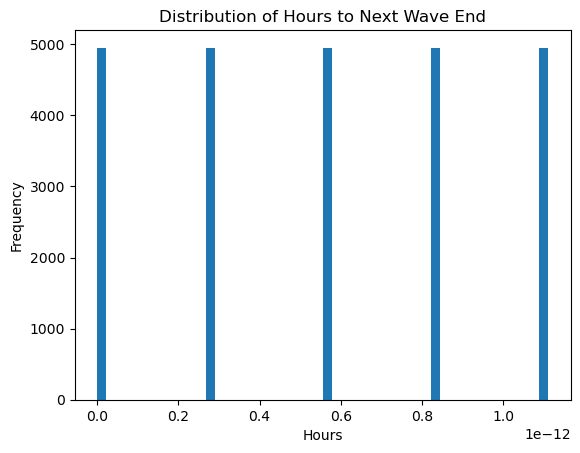

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y_hours_seq, bins=50)
plt.title("Distribution of Hours to Next Wave End")
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.show()


In [ ]:
model.compile(
    optimizer='adam',
    loss={
        'wave_output': 'sparse_categorical_crossentropy',
        'pv_output': 'binary_crossentropy',
        'hours_output': 'mse'
    },
    loss_weights={
        'wave_output': 1.0,
        'pv_output': 1.0,
        'hours_output': 5.0  # ‚Üê Ÿàÿ≤ŸÜ ÿ®€åÿ¥ÿ™ÿ± ÿ®Ÿá ÿ≤ŸÖÿßŸÜ ŸÖŸàÿ¨ ÿ®ÿπÿØ€å
    },
    metrics={
        'wave_output': 'accuracy',
        'pv_output': 'accuracy',
        'hours_output': 'mae'
    }
)


In [ ]:
print("X_seq shape:", X_seq.shape)
print("y_wave_seq shape:", y_wave_seq.shape)
print("y_pv_seq_categorical shape:", y_pv_seq_categorical.shape)
print("y_hours_scaled shape:", y_hours_scaled.shape)


X_seq shape: (24754, 90, 24)
y_wave_seq shape: (24754,)
y_pv_seq_categorical shape: (24754, 2)
y_hours_scaled shape: (24754,)


In [ ]:
# ÿ™ÿ∫€å€åÿ± ŸÑÿß€åŸá ÿÆÿ±Ÿàÿ¨€å pv_output ÿ®Ÿá ÿ¥⁄©ŸÑ ÿ≤€åÿ±:
out_pv = Dense(16, activation='relu')(x)
out_pv = Dense(1, activation='sigmoid', name='pv_output')(out_pv)

# ⁄©ÿßŸÖŸæÿß€åŸÑ:
model.compile(
    optimizer='adam',
    loss={
        'wave_output': 'sparse_categorical_crossentropy',
        'pv_output': 'binary_crossentropy',
        'hours_output': 'mse'
    },
    metrics={
        'wave_output': 'accuracy',
        'pv_output': 'accuracy',
        'hours_output': 'mae'
    }
)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

sequence_length = 90
feature_dim = 24  # ŸÅÿ±ÿ∂ ⁄©ÿ±ÿØŸÖ 24 Ÿà€å⁄ò⁄Ø€å ÿØÿßÿ±€åÿå ÿ∑ÿ®ŸÇ ÿ¥⁄©ŸÑ X_seq

input_layer = Input(shape=(sequence_length, feature_dim))

x = LSTM(64, return_sequences=False)(input_layer)
x = Dropout(0.3)(x)

# ÿÆÿ±Ÿàÿ¨€å 1: ÿ∑ÿ®ŸÇŸá‚Äåÿ®ŸÜÿØ€å ŸÖŸàÿ¨ (5 ⁄©ŸÑÿßÿ≥)
out_wave = Dense(32, activation='relu')(x)
out_wave = Dense(5, activation='softmax', name='wave_output')(out_wave)  # 5 ⁄©ŸÑÿßÿ≥

# ÿÆÿ±Ÿàÿ¨€å 2: ÿ∑ÿ®ŸÇŸá‚Äåÿ®ŸÜÿØ€å ŸÇŸÑŸá/ÿØÿ±Ÿá (ÿØŸàÿ™ÿß ⁄©ŸÑÿßÿ≥ ÿ®ÿß sigmoid)
out_pv = Dense(16, activation='relu')(x)
out_pv = Dense(1, activation='sigmoid', name='pv_output')(out_pv)

# ÿÆÿ±Ÿàÿ¨€å 3: ÿ±⁄Øÿ±ÿ≥€åŸàŸÜ ÿ≥ÿßÿπÿ™ ÿ®ÿßŸÇ€å‚ÄåŸÖÿßŸÜÿØŸá (€å⁄© ÿπÿØÿØ ÿ≠ŸÇ€åŸÇ€å)
out_hours = Dense(16, activation='relu')(x)
out_hours = Dense(1, activation='linear', name='hours_output')(out_hours)

model = Model(inputs=input_layer, outputs=[out_wave, out_pv, out_hours])

model.compile(
    optimizer='adam',
    loss={
        'wave_output': 'sparse_categorical_crossentropy',  # ÿ®ÿ±⁄Üÿ≥ÿ® y_wave_seq ÿ®ÿß€åÿØ ÿπÿØÿØ ÿµÿ≠€åÿ≠ ÿ®ÿßÿ¥Ÿá
        'pv_output': 'binary_crossentropy',                # ÿ®ÿ±⁄Üÿ≥ÿ® y_pv_seq ÿ®ÿß€åÿØ 0 €åÿß 1 ÿ®ÿßÿ¥Ÿá
        'hours_output': 'mse'
    },
    metrics={
        'wave_output': 'accuracy',
        'pv_output': 'accuracy',
        'hours_output': 'mae'
    }
)

model.summary()

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_seq,
    {
        'wave_output': y_wave_seq,    # shape (24754,), int labels 0..4
        'pv_output': y_pv_seq,        # shape (24754,), 0 or 1, int or float
        'hours_output': y_hours_scaled  # shape (24754, 1)
    },
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)


Model: "functional_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_1       ‚îÇ (None, 90, 24)    ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_1 (LSTM)       ‚îÇ (None, 64)        ‚îÇ     22,784 ‚îÇ input_layer_1[0]‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout) ‚îÇ (None, 64)        ‚îÇ          0 ‚îÇ lstm_1[0][0]      ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_4 (Dense)     ‚îÇ (None, 32)        ‚îÇ      2,080 ‚îÇ dropout_1[0][0]   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_5 (Dense)     ‚îÇ (None, 16)        ‚îÇ      1,040 ‚îÇ dropout_1[0][0]   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_6 (Dense)     ‚îÇ (None, 16)        ‚îÇ      1,040 ‚îÇ dropout_1[0][0]   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ wave_output (Dense) ‚îÇ (None, 5)         ‚îÇ        165 ‚îÇ dense_4[0][0]     ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ pv_output (Dense)   ‚îÇ (None, 1)         ‚îÇ         17 ‚îÇ dense_5[0][0]     ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ hours_output        ‚îÇ (None, 1)         ‚îÇ         17 ‚îÇ dense_6[0][0]     ‚îÇ
‚îÇ (Dense)             ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 27,143 (106.03 KB)

 Trainable params: 27,143 (106.03 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
697/697 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44s 54ms/step - hours_output_loss: 0.1421 - hours_output_mae: 0.3200 - loss: 2.4321 - pv_output_accuracy: 0.5947 - pv_output_loss: 0.6760 - wave_output_accuracy: 0.1954 - wave_output_loss: 1.6140 - val_hours_output_loss: 0.1255 - val_hours_output_mae: 0.3039 - val_loss: 2.4080 - val_pv_output_accuracy: 0.6002 - val_pv_output_loss: 0.6732 - val_wave_output_accuracy: 0.2019 - val_wave_output_loss: 1.6095
Epoch 2/50
697/697 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 50s 72ms/step - hours_output_loss: 0.1281 - hours_output_mae: 0.3090 - loss: 2.4130 - pv_output_accuracy: 0.5985 - pv_output_loss: 0.6744 - wave_output_accuracy: 0.1983 - wave_output_loss: 1.6105 - val_hours_output_loss: 0.1250 - val_hours_output_mae: 0.3015 - val_loss: 2.4074 - val_pv_output_accuracy: 0.6002 - val_pv_output_loss: 0.6730 - val_wave_output_accuracy: 0.1995 - val_wave_output_loss: 1.6095
Epoch 3/50
697/697 ‚îÅ‚îÅ‚îÅ

In [ ]:
preds = model.predict(X_seq[:20])
pred_wave = preds[0].argmax(axis=1)
pred_pv = (preds[1] > 0.5).astype(int).flatten()
pred_hours = preds[2].flatten()

for i in range(20):
    print(f"{i+1:2d}: Peak/Valley ‚Üí {pred_pv[i]}, Wave ‚Üí {pred_wave[i]}, Ends in {pred_hours[i]:.2f} hours")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 922ms/step
 1: Peak/Valley ‚Üí 1, Wave ‚Üí 0, Ends in 0.76 hours
 2: Peak/Valley ‚Üí 0, Wave ‚Üí 1, Ends in 0.46 hours
 3: Peak/Valley ‚Üí 1, Wave ‚Üí 2, Ends in 0.25 hours
 4: Peak/Valley ‚Üí 0, Wave ‚Üí 3, Ends in 0.01 hours
 5: Peak/Valley ‚Üí 0, Wave ‚Üí 4, Ends in 1.00 hours
 6: Peak/Valley ‚Üí 1, Wave ‚Üí 0, Ends in 0.77 hours
 7: Peak/Valley ‚Üí 0, Wave ‚Üí 1, Ends in 0.53 hours
 8: Peak/Valley ‚Üí 1, Wave ‚Üí 2, Ends in 0.24 hours
 9: Peak/Valley ‚Üí 0, Wave ‚Üí 3, Ends in -0.02 hours
10: Peak/Valley ‚Üí 0, Wave ‚Üí 4, Ends in 1.02 hours
11: Peak/Valley ‚Üí 1, Wave ‚Üí 0, Ends in 0.77 hours
12: Peak/Valley ‚Üí 0, Wave ‚Üí 1, Ends in 0.47 hours
13: Peak/Valley ‚Üí 1, Wave ‚Üí 2, Ends in 0.24 hours
14: Peak/Valley ‚Üí 0, Wave ‚Üí 3, Ends in -0.01 hours
15: Peak/Valley ‚Üí 0, Wave ‚Üí 4, Ends in 1.00 hours
16: Peak/Valley ‚Üí 1, Wave ‚Üí 0, Ends in 0.76 hours
17: Peak/Valley ‚Üí 0, Wave ‚Üí 1, Ends in 0.49 hours
1

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

# ŸÖÿ±ÿ≠ŸÑŸá 1 Ÿà 2: ÿ™ÿπÿ±€åŸÅ ŸÖÿØŸÑ ÿØ€åŸÅ€åŸà⁄òŸÜ ÿ¥ÿ±ÿ∑€å ÿ≥ÿßÿØŸá (MLP)
def build_diffusion_predictor():
    # Ÿàÿ±ŸàÿØ€å ŸÜŸà€åÿ≤ €å⁄© ÿπÿØÿØ ÿßÿ≥⁄©ÿßŸÑÿ± (ŸÖÿ´ŸÑÿßŸã ŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ ŸÜŸà€åÿ≤ ⁄ØŸàÿ≥€å)
    noise_input = Input(shape=(1,), name='noise_input')

    # Ÿàÿ±ŸàÿØ€å embedding ŸÖÿØŸÑ LSTM ÿ®Ÿá ÿπŸÜŸàÿßŸÜ ÿ¥ÿ±ÿ∑ÿå ÿ®ÿ±ÿØÿßÿ± 64 ÿ®ÿπÿØ€å
    condition_input = Input(shape=(64,), name='condition_input')

    # ÿ™ÿ±⁄©€åÿ® ŸÜŸà€åÿ≤ Ÿà embedding ÿ®Ÿá ÿµŸàÿ±ÿ™ ⁄©ÿßŸÜ⁄©ÿ™ (ÿßÿØÿ∫ÿßŸÖ)
    x = Concatenate()([noise_input, condition_input])

    # ⁄ÜŸÜÿØ ŸÑÿß€åŸá Dense ÿ®ÿß ŸÅÿπÿßŸÑÿ≥ÿßÿ≤€å ReLU
    x = Dense(128, activation='relu')(x)
    x = Dense(128, activation='relu')(x)

    # ÿÆÿ±Ÿàÿ¨€å: ŸÖŸÇÿØÿßÿ± ÿπÿØÿØ€å Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿ¥ÿØŸá (ÿ≤ŸÖÿßŸÜ ÿ™ŸÖ€åÿ≤ ÿ®ÿßŸÇ€å‚ÄåŸÖÿßŸÜÿØŸá)
    out = Dense(1, name='predicted_clean')(x)

    # ÿ≥ÿßÿÆÿ™ ŸÖÿØŸÑ ÿ®ÿß ÿØŸà Ÿàÿ±ŸàÿØ€å Ÿà €å⁄© ÿÆÿ±Ÿàÿ¨€å
    model = Model(inputs=[noise_input, condition_input], outputs=out, name='diffusion_predictor')

    return model

# ÿ≥ÿßÿÆÿ™ ŸÖÿØŸÑ
diffusion_model = build_diffusion_predictor()
diffusion_model.summary()


Model: "diffusion_predictor"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ noise_input         ‚îÇ (None, 1)         ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ condition_input     ‚îÇ (None, 64)        ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ concatenate         ‚îÇ (None, 65)        ‚îÇ          0 ‚îÇ noise_input[0][0‚Ä¶ ‚îÇ
‚îÇ (Concatenate)       ‚îÇ                   ‚îÇ            ‚îÇ condition_input[‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)       ‚îÇ (None, 128)       ‚îÇ      8,448 ‚îÇ concatenate[0][0] ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)     ‚îÇ (None, 128)       ‚îÇ     16,512 ‚îÇ dense[0][0]       ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ predicted_clean     ‚îÇ (None, 1)         ‚îÇ        129 ‚îÇ dense_1[0][0]     ‚îÇ
‚îÇ (Dense)             ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 25,089 (98.00 KB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

T = 1000  # ÿ™ÿπÿØÿßÿØ ÿ™ÿß€åŸÖ ÿßÿ≥ÿ™Ÿæ‚ÄåŸáÿß€å ÿßŸÜÿ™ÿ¥ÿßÿ±

# ÿ≥ÿßÿÆÿ™ ÿ¢ÿ±ÿß€åŸá‚Äå€å alpha_t (ÿ≥ÿ±€å ⁄©ÿßŸáÿ¥ ŸÜŸà€åÿ≤)
beta_start = 0.0001
beta_end = 0.02
beta = np.linspace(beta_start, beta_end, T, dtype=np.float32)  # ÿßŸÅÿ≤ÿß€åÿ¥ ÿ™ÿØÿ±€åÿ¨€å ŸÜŸà€åÿ≤
alpha = 1 - beta
alpha_bar = np.cumprod(alpha)  # Œ±ÃÑ_t = ‚àè_{s=1}^t Œ±_s

# ÿ™ÿßÿ®ÿπ ŸÜŸÖŸàŸÜŸá‚Äå⁄Ø€åÿ±€å x_t ÿßÿ≤ x_0 Ÿà ŸÜŸà€åÿ≤
def q_sample(x0, t, noise):
    """
    x0: ŸÖŸÇÿØÿßÿ± ÿ™ŸÖ€åÿ≤ ŸàÿßŸÇÿπ€å (batch_size, 1)
    t: timestep (batch_size,), ÿπÿØÿØ ÿµÿ≠€åÿ≠ ÿ®€åŸÜ 0 ÿ™ÿß T-1
    noise: ŸÜŸà€åÿ≤ ŸÜŸÖŸàŸÜŸá‚Äå⁄Ø€åÿ±€å ÿ¥ÿØŸá (batch_size, 1)
    """
    sqrt_alpha_bar = np.sqrt(alpha_bar[t])[:, None]  # ÿ®Ÿá ÿ¥⁄©ŸÑ (batch_size, 1)
    sqrt_one_minus_alpha_bar = np.sqrt(1 - alpha_bar[t])[:, None]
    
    return sqrt_alpha_bar * x0 + sqrt_one_minus_alpha_bar * noise

# ÿ™ÿ®ÿØ€åŸÑ numpy ÿ®Ÿá tf
import tensorflow as tf

def q_sample_tf(x0, t, noise):
    sqrt_alpha_bar_t = tf.gather(tf.sqrt(alpha_bar), t)[:, None]
    sqrt_one_minus_alpha_bar_t = tf.sqrt(1 - tf.gather(alpha_bar, t))[:, None]
    return sqrt_alpha_bar_t * x0 + sqrt_one_minus_alpha_bar_t * noise

# ŸÖÿ´ÿßŸÑ ÿ≥ÿßÿØŸá ÿ≠ŸÑŸÇŸá ÿ¢ŸÖŸàÿ≤ÿ¥
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
mse_loss = tf.keras.losses.MeanSquaredError()

@tf.function
def train_step(x0_batch, condition_batch):
    batch_size = tf.shape(x0_batch)[0]
    t = tf.random.uniform((batch_size,), minval=0, maxval=T, dtype=tf.int32)  # ÿ™ÿß€åŸÖ ÿßÿ≥ÿ™Ÿæ ÿ™ÿµÿßÿØŸÅ€å
    noise = tf.random.normal(tf.shape(x0_batch))
    
    # ÿ≥ÿßÿÆÿ™ x_t noisy
    x_t = q_sample_tf(x0_batch, t, noise)
    
    with tf.GradientTape() as tape:
        noise_pred = diffusion_model([x_t, condition_batch], training=True)  # Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ŸÜŸà€åÿ≤
        loss = mse_loss(noise, noise_pred)
    gradients = tape.gradient(loss, diffusion_model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, diffusion_model.trainable_variables))
    return loss

# ÿ≠ÿßŸÑÿß ÿ®ÿ±ÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥ÿå ÿ®ÿß€åÿØ ÿØÿ≥ÿ™Ÿá‚ÄåŸáÿß€å€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß (x0, condition) ÿ¢ŸÖÿßÿØŸá ⁄©ŸÜ€åŸÖ


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Reshape, Dense, LSTM, Input
from tensorflow.keras.models import Model

# ŸÅÿ±ÿ∂: embedding ÿ¥ÿ±ÿ∑ (shape = (None, 64))
cond_input = Input(shape=(64,), name='condition_embedding')

# ŸÅÿ±ÿ∂: Ÿàÿ±ŸàÿØ€å ÿØ€åŸÅ€åŸà⁄òŸÜ (ÿ¥⁄©ŸÑ (None, 1)) ⁄©Ÿá ŸÖŸÇÿØÿßÿ± ÿ≥ÿßÿπÿ™ ÿ®ÿßŸÇ€å‚ÄåŸÖÿßŸÜÿØŸá ÿ®ÿß ŸÜŸà€åÿ≤ Ÿáÿ≥ÿ™
diff_input = Input(shape=(1,), name='diffusion_input')

# ÿ™ÿ±⁄©€åÿ® Ÿàÿ±ŸàÿØ€å Ÿà ÿ¥ÿ±ÿ∑
x = Concatenate()([diff_input, cond_input])  # (batch_size, 1+64=65)
x = Dense(64, activation='relu')(x)

# ÿ®Ÿá ÿ¨ÿß€å tf.expand_dimsÿå ÿßÿ≤ Reshape ÿßÿ≥ÿ™ŸÅÿßÿØŸá ⁄©ŸÜ:
x = Reshape((1, 64))(x)

# €åÿß ÿ®ÿß Lambda:
# x = Lambda(lambda t: tf.expand_dims(t, axis=1))(x)

x = LSTM(64, return_sequences=False)(x)# ÿÆÿ±Ÿàÿ¨€å ŸÜŸáÿß€å€åÿå ŸÖŸÇÿØÿßÿ± ÿ≥ÿßÿπÿ™ ÿ®ÿØŸàŸÜ ŸÜŸà€åÿ≤
output = Dense(1, activation='linear')(x)

diff_model = Model(inputs=[diff_input, cond_input], outputs=output)
diff_model.compile(optimizer='adam', loss='mse')

diff_model.summary()


Model: "functional_4"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ diffusion_input     ‚îÇ (None, 1)         ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ condition_embedding ‚îÇ (None, 64)        ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ concatenate_3       ‚îÇ (None, 65)        ‚îÇ          0 ‚îÇ diffusion_input[‚Ä¶ ‚îÇ
‚îÇ (Concatenate)       ‚îÇ                   ‚îÇ            ‚îÇ condition_embedd‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_12 (Dense)    ‚îÇ (None, 64)        ‚îÇ      4,224 ‚îÇ concatenate_3[0]‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ reshape (Reshape)   ‚îÇ (None, 1, 64)     ‚îÇ          0 ‚îÇ dense_12[0][0]    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_3 (LSTM)       ‚îÇ (None, 64)        ‚îÇ     33,024 ‚îÇ reshape[0][0]     ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_13 (Dense)    ‚îÇ (None, 1)         ‚îÇ         65 ‚îÇ lstm_3[0][0]      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 37,313 (145.75 KB)

 Trainable params: 37,313 (145.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

# Ÿæ€åÿØÿß ⁄©ÿ±ÿØŸÜ ŸÜŸÇÿßÿ∑ ÿ¥ÿ±Ÿàÿπ ŸÖŸàÿ¨‚ÄåŸáÿß
wave_changes = wave_df['Wave_Label'].diff() != 0
start_indices = wave_df.index[wave_changes].tolist()
start_indices.append(wave_df.index[-1] + 1)  # ÿ®ÿ±ÿß€å ÿ±ÿßÿ≠ÿ™€åÿå ÿßŸÜÿ™Ÿáÿß€å ÿØÿßÿØŸá ÿ±Ÿà ÿßÿ∂ÿßŸÅŸá ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ

# ÿ≥ÿßÿÆÿ™ ÿ¢ÿ±ÿß€åŸá ÿ®ÿ±ÿß€å remaining_hours
remaining_hours = np.zeros(len(wave_df))

for i in range(len(start_indices)-1):
    start = start_indices[i]
    end = start_indices[i+1] - 1
    length = end - start + 1
    # ÿ®ÿ±ÿß€å Ÿáÿ± ÿ±ÿØ€åŸÅÿå ŸÅÿßÿµŸÑŸá ÿ™ÿß Ÿæÿß€åÿßŸÜ ŸÖŸàÿ¨ ŸÅÿπŸÑ€å (end - current_index)
    for idx in range(start, end + 1):
        remaining_hours[idx] = length - (idx - start)

# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ
wave_df['remaining_hours'] = remaining_hours


In [ ]:
X_seq = X_seq.astype(np.float32)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

sequence_length = 90
feature_dim = 24

input_layer = Input(shape=(sequence_length, feature_dim))

# ŸÑÿß€åŸá LSTM
x = LSTM(64, return_sequences=False)(input_layer)

# ⁄Øÿ±ŸÅÿ™ŸÜ embedding ŸÇÿ®ŸÑ ÿßÿ≤ Dropout
embedding_output = x

# ÿßÿØÿßŸÖŸá ŸÖÿØŸÑ ÿ®ÿß Dropout Ÿà ÿÆÿ±Ÿàÿ¨€å‚ÄåŸáÿß
drop = Dropout(0.3)(embedding_output)

# ÿÆÿ±Ÿàÿ¨€å 1: ÿ∑ÿ®ŸÇŸá‚Äåÿ®ŸÜÿØ€å ŸÖŸàÿ¨ (5 ⁄©ŸÑÿßÿ≥)
out_wave = Dense(32, activation='relu')(drop)
out_wave = Dense(5, activation='softmax', name='wave_output')(out_wave)

# ÿÆÿ±Ÿàÿ¨€å 2: ÿ∑ÿ®ŸÇŸá‚Äåÿ®ŸÜÿØ€å ŸÇŸÑŸá/ÿØÿ±Ÿá (ÿØŸàÿ™ÿß ⁄©ŸÑÿßÿ≥)
out_pv = Dense(16, activation='relu')(drop)
out_pv = Dense(1, activation='sigmoid', name='pv_output')(out_pv)

# ÿÆÿ±Ÿàÿ¨€å 3: ÿ±⁄Øÿ±ÿ≥€åŸàŸÜ ÿ≥ÿßÿπÿ™ ÿ®ÿßŸÇ€å‚ÄåŸÖÿßŸÜÿØŸá
out_hours = Dense(16, activation='relu')(drop)
out_hours = Dense(1, activation='linear', name='hours_output')(out_hours)

# ŸÖÿØŸÑ ÿßÿµŸÑ€å ÿ®ÿß ÿ≥Ÿá ÿÆÿ±Ÿàÿ¨€å
model = Model(inputs=input_layer, outputs=[out_wave, out_pv, out_hours])

model.compile(
    optimizer='adam',
    loss={
        'wave_output': 'sparse_categorical_crossentropy',
        'pv_output': 'binary_crossentropy',
        'hours_output': 'mse'
    },
    metrics={
        'wave_output': 'accuracy',
        'pv_output': 'accuracy',
        'hours_output': 'mae'
    }
)

# ŸÖÿØŸÑ embedding ÿ®ÿ±ÿß€å ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿÆÿ±Ÿàÿ¨€å LSTM ÿ®ÿØŸàŸÜ Dropout
embedding_model = Model(inputs=input_layer, outputs=embedding_output)

# summary ŸÖÿØŸÑ ÿßÿµŸÑ€å
model.summary()


Model: "functional_6"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_2       ‚îÇ (None, 90, 24)    ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_4 (LSTM)       ‚îÇ (None, 64)        ‚îÇ     22,784 ‚îÇ input_layer_2[0]‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout) ‚îÇ (None, 64)        ‚îÇ          0 ‚îÇ lstm_4[0][0]      ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_14 (Dense)    ‚îÇ (None, 32)        ‚îÇ      2,080 ‚îÇ dropout_2[0][0]   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_15 (Dense)    ‚îÇ (None, 16)        ‚îÇ      1,040 ‚îÇ dropout_2[0][0]   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_16 (Dense)    ‚îÇ (None, 16)        ‚îÇ      1,040 ‚îÇ dropout_2[0][0]   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ wave_output (Dense) ‚îÇ (None, 5)         ‚îÇ        165 ‚îÇ dense_14[0][0]    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ pv_output (Dense)   ‚îÇ (None, 1)         ‚îÇ         17 ‚îÇ dense_15[0][0]    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ hours_output        ‚îÇ (None, 1)         ‚îÇ         17 ‚îÇ dense_16[0][0]    ‚îÇ
‚îÇ (Dense)             ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 27,143 (106.03 KB)

 Trainable params: 27,143 (106.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_seq_embedding = embedding_model.predict(X_seq.astype('float32'))  


774/774 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 58s 71ms/step


In [ ]:
embedding_model = tf.keras.Model(inputs=model.input, outputs=model.layers[2].output)  
X_seq_embedding = embedding_model.predict(X_seq, batch_size=64) 

387/387 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 22ms/step


In [ ]:
import numpy as np

diffusion_clean = y_hours_scaled

# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ŸÜŸà€åÿ≤ ⁄ØŸàÿ≥€å ÿ®ÿß ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ± 0.1 
noise = np.random.normal(loc=0.0, scale=0.1, size=diffusion_clean.shape)
diffusion_noisy = diffusion_clean + noise


In [ ]:
from tensorflow.keras.layers import Concatenate

input_noisy = tf.keras.Input(shape=(1,), name='noisy_hours')
input_embed = tf.keras.Input(shape=(64,), name='embedding')

x = Concatenate()([input_noisy, input_embed])
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='linear')(x)

diff_model = tf.keras.Model(inputs=[input_noisy, input_embed], outputs=output)

diff_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
diff_model.summary()


Model: "functional_10"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ noisy_hours         ‚îÇ (None, 1)         ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ embedding           ‚îÇ (None, 64)        ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ concatenate_5       ‚îÇ (None, 65)        ‚îÇ          0 ‚îÇ noisy_hours[0][0‚Ä¶ ‚îÇ
‚îÇ (Concatenate)       ‚îÇ                   ‚îÇ            ‚îÇ embedding[0][0]   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_20 (Dense)    ‚îÇ (None, 128)       ‚îÇ      8,448 ‚îÇ concatenate_5[0]‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_21 (Dense)    ‚îÇ (None, 64)        ‚îÇ      8,256 ‚îÇ dense_20[0][0]    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_22 (Dense)    ‚îÇ (None, 1)         ‚îÇ         65 ‚îÇ dense_21[0][0]    ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,769 (65.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = diff_model.fit(
    [diffusion_noisy, X_seq_embedding],
    diffusion_clean,
    batch_size=64,
    epochs=50,
    validation_split=0.1,
    callbacks=[early_stopping]
)


Epoch 1/50
349/349 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 3ms/step - loss: 0.0441 - mae: 0.1342 - val_loss: 0.0107 - val_mae: 0.0833
Epoch 2/50
349/349 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - loss: 0.0087 - mae: 0.0723 - val_loss: 0.0089 - val_mae: 0.0736
Epoch 3/50
349/349 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - loss: 0.0086 - mae: 0.0710 - val_loss: 0.0093 - val_mae: 0.0743
Epoch 4/50
349/349 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - loss: 0.0085 - mae: 0.0702 - val_loss: 0.0089 - val_mae: 0.0736
Epoch 5/50
349/349 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - loss: 0.0085 - mae: 0.0696 - val_loss: 0.0087 - val_mae: 0.0720
Epoch 6/50
349/349 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - loss: 0.0083 - mae: 0.0687 - val_loss: 0.0087 - val_mae: 0.0708
Epoch 7/50
349/349 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

embedding_dim = 64

# Ÿàÿ±ŸàÿØ€å‚ÄåŸáÿß€å ŸÖÿØŸÑ: ŸÜŸà€åÿ≤ Ÿà ÿ¥ÿ±ÿ∑
noisy_input = Input(shape=(embedding_dim,), name='noisy_input')
condition_input = Input(shape=(embedding_dim,), name='condition_input')

# ÿßÿØÿ∫ÿßŸÖ ŸÜŸà€åÿ≤ Ÿà ÿ¥ÿ±ÿ∑
merged = Concatenate()([noisy_input, condition_input])  # shape = (128,)

# ÿ¥ÿ®⁄©Ÿá ÿ®ÿßÿ≤ÿ≥ÿßÿ≤€å‚Äå⁄©ŸÜŸÜÿØŸá
x = Dense(128, activation='relu')(merged)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='linear')(x)  # ÿÆÿ±Ÿàÿ¨€å ŸÜŸáÿß€å€å

# ÿ≥ÿßÿÆÿ™ ŸÖÿØŸÑ
diff_model = Model(inputs=[noisy_input, condition_input], outputs=output)
diff_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:
# ÿß€åÿ¨ÿßÿØ ŸÜÿ≥ÿÆŸá ŸÜŸà€åÿ≤€å ÿßÿ≤ embeddingŸáÿß
noise_factor = 0.1
diffusion_noisy = X_seq_embedding + noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=X_seq_embedding.shape
)

# ŸáÿØŸÅÿå ŸÜÿ≥ÿÆŸá ÿ™ŸÖ€åÿ≤ embedding ÿßÿ≥ÿ™
diffusion_clean = X_seq_embedding.copy()


In [ ]:
print("diffusion_noisy shape:", diffusion_noisy.shape)
print("diffusion_clean shape:", diffusion_clean.shape)


diffusion_noisy shape: (24754, 64)
diffusion_clean shape: (24754, 64)


In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Concatenate

# Ÿàÿ±ŸàÿØ€å ŸÜŸà€åÿ≤€å Ÿà embedding ÿßÿµŸÑ€å
input_noisy = Input(shape=(64,), name='noisy_input')
input_cond = Input(shape=(64,), name='conditional_embedding')

# ÿ™ÿ±⁄©€åÿ® ŸÜŸà€åÿ≤ Ÿà embedding ÿ¥ÿ±ÿ∑€å
x = Concatenate()([input_noisy, input_cond])  # ÿ¥⁄©ŸÑ ŸÜŸáÿß€å€å: (128,)

# ÿ¥ÿ®⁄©Ÿá ÿ≥ÿßÿØŸá ÿ®ÿ±ÿß€å denoising
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(64, activation='linear')(x)

diff_model = Model(inputs=[input_noisy, input_cond], outputs=output)
diff_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:
# ÿß€åÿ¨ÿßÿØ ÿØŸàÿ®ÿßÿ±Ÿá ŸÜŸà€åÿ≤ ÿ±Ÿà€å embedding ÿßÿµŸÑ€å
noise_factor = 0.1
diffusion_noisy = X_seq_embedding + noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=X_seq_embedding.shape
)

# ŸáÿØŸÅ: ŸÜÿ≥ÿÆŸá ÿ™ŸÖ€åÿ≤ embedding
diffusion_clean = X_seq_embedding.copy()

# ÿ¢ŸÖŸàÿ≤ÿ¥
history = diff_model.fit(
    [diffusion_noisy, X_seq_embedding],
    diffusion_clean,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)


Epoch 1/30
697/697 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 4ms/step - loss: 0.0028 - mae: 0.0328 - val_loss: 6.0629e-04 - val_mae: 0.0188
Epoch 2/30
697/697 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 3ms/step - loss: 1.4022e-04 - mae: 0.0091 - val_loss: 3.7508e-04 - val_mae: 0.0144
Epoch 3/30
697/697 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 3ms/step - loss: 7.3920e-05 - mae: 0.0066 - val_loss: 3.0127e-04 - val_mae: 0.0128
Epoch 4/30
697/697 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - loss: 5.2410e-05 - mae: 0.0055 - val_loss: 2.4354e-04 - val_mae: 0.0114
Epoch 5/30
697/697 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - loss: 4.1050e-05 - mae: 0.0049 - val_loss: 2.1327e-04 - val_mae: 0.0107
Epoch 6/30
697/697 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - loss: 3.2494e-05 - mae: 0.0044 - val_loss: 1.9598e-04 - val_mae: 0.0102
Epoch 7/

In [ ]:
current_embedding = X_seq_embedding[-1]  

In [ ]:
num_scenarios = 5
noise_factor = 0.1

noisy_scenarios = np.array([
    current_embedding + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=current_embedding.shape)
    for _ in range(num_scenarios)
])


In [ ]:
# ŸÖÿØŸÑ ÿØ€åŸÅ€åŸà⁄òŸÜ ŸÖ€å‚ÄåÿÆŸàÿßÿØ Ÿàÿ±ŸàÿØ€å ÿØŸàŸÖ ÿ±Ÿà ŸáŸÖ ÿØÿßÿ¥ÿ™Ÿá ÿ®ÿßÿ¥Ÿá (ÿ¥ÿ±ÿ∑)
reconstructed_scenarios = diff_model.predict([noisy_scenarios, np.repeat(current_embedding[np.newaxis, :], num_scenarios, axis=0)])


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 745ms/step


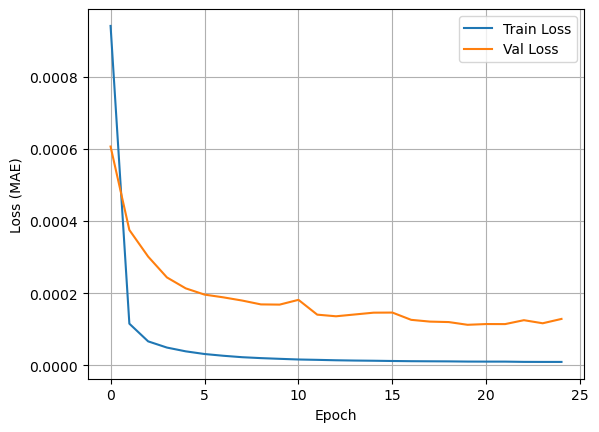

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MAE)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
test_results = diff_model.evaluate([diffusion_noisy_test, X_seq_embedding_test], diffusion_clean_test)
print("Test Loss (MAE):", test_results)


78/78 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - loss: 0.3883 - mae: 0.5178
Test Loss (MAE): [0.39240762591362, 0.5201271772384644]


In [ ]:
# embedding ŸÅÿπŸÑ€å
current_embedding = X_seq_embedding_test[-1]  
n_scenarios = 5
noise_factor = 0.1

generated_embeddings = []

for i in range(n_scenarios):
    noise = noise_factor * np.random.normal(loc=0.0, scale=1.0, size=current_embedding.shape)
    noisy_input = current_embedding + noise
    cleaned_embedding = diff_model.predict([np.expand_dims(noisy_input, axis=0),
                                            np.expand_dims(current_embedding, axis=0)], verbose=0)
    generated_embeddings.append(cleaned_embedding.squeeze())



In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout

# Ÿàÿ±ŸàÿØ€å embedding
embedding_input = Input(shape=(64,), name='embedding_input')

# ŸÑÿß€åŸá‚ÄåŸáÿß€å ŸÖÿ¥ÿ™ÿ±⁄©
x = Dense(128, activation='relu')(embedding_input)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)

# ÿÆÿ±Ÿàÿ¨€å 1: ŸÜŸàÿπ ŸÖŸàÿ¨ (5 ⁄©ŸÑÿßÿ≥)
output_wave = Dense(5, activation='softmax', name='wave_output')(x)

# ÿÆÿ±Ÿàÿ¨€å 2: ŸÇŸÑŸá €åÿß ÿØÿ±Ÿá (ÿ®ÿß€åŸÜÿ±€å)
output_pv = Dense(1, activation='sigmoid', name='pv_output')(x)

# ÿÆÿ±Ÿàÿ¨€å 3: ŸÖÿØÿ™ ÿ≤ŸÖÿßŸÜ ÿ®ÿßŸÇ€å‚ÄåŸÖÿßŸÜÿØŸá
output_hours = Dense(1, activation='linear', name='hours_output')(x)

# ŸÖÿØŸÑ ŸÜŸáÿß€å€å
wave_classifier_model = Model(inputs=embedding_input, outputs=[output_wave, output_pv, output_hours])

# ⁄©ÿßŸÖŸæÿß€åŸÑ ŸÖÿØŸÑ
wave_classifier_model.compile(
    optimizer='adam',
    loss={
        'wave_output': 'sparse_categorical_crossentropy',
        'pv_output': 'binary_crossentropy',
        'hours_output': 'mse'
    },
    metrics={
        'wave_output': 'accuracy',
        'pv_output': 'accuracy',
        'hours_output': 'mae'
    }
)

wave_classifier_model.summary()


Model: "functional_15"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding_input     ‚îÇ (None, 64)        ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_35 (Dense)    ‚îÇ (None, 128)       ‚îÇ      8,320 ‚îÇ embedding_input[‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_3 (Dropout) ‚îÇ (None, 128)       ‚îÇ          0 ‚îÇ dense_35[0][0]    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_36 (Dense)    ‚îÇ (None, 64)        ‚îÇ      8,256 ‚îÇ dropout_3[0][0]   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ wave_output (Dense) ‚îÇ (None, 5)         ‚îÇ        325 ‚îÇ dense_36[0][0]    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ pv_output (Dense)   ‚îÇ (None, 1)         ‚îÇ         65 ‚îÇ dense_36[0][0]    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ hours_output        ‚îÇ (None, 1)         ‚îÇ         65 ‚îÇ dense_36[0][0]    ‚îÇ
‚îÇ (Dense)             ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 17,031 (66.53 KB)

 Trainable params: 17,031 (66.53 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = wave_classifier_model.fit(
    X_seq_embedding,
    {
        'wave_output': y_wave,
        'pv_output': y_pv,
        'hours_output': y_hours
    },
    batch_size=32,
    epochs=30,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ]
)


Epoch 1/30
697/697 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 4ms/step - hours_output_loss: 0.0016 - hours_output_mae: 0.0281 - loss: 2.2881 - pv_output_accuracy: 0.5982 - pv_output_loss: 0.6752 - wave_output_accuracy: 0.1996 - wave_output_loss: 1.6113 - val_hours_output_loss: 5.5796e-05 - val_hours_output_mae: 0.0053 - val_loss: 2.2827 - val_pv_output_accuracy: 0.6002 - val_pv_output_loss: 0.6731 - val_wave_output_accuracy: 0.1999 - val_wave_output_loss: 1.6096
Epoch 2/30
697/697 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 5ms/step - hours_output_loss: 9.4068e-05 - hours_output_mae: 0.0076 - loss: 2.2859 - pv_output_accuracy: 0.5960 - pv_output_loss: 0.6755 - wave_output_accuracy: 0.1967 - wave_output_loss: 1.6103 - val_hours_output_loss: 1.0351e-05 - val_hours_output_mae: 0.0025 - val_loss: 2.2824 - val_pv_output_accuracy: 0.6002 - val_pv_output_loss: 0.6731 - val_wave_output_accuracy: 0.2011 - val_wave_output_loss: 1.6094
Epoch 3/30
697/697 ‚

In [ ]:
import numpy as np

# ÿ™ÿ®ÿØ€åŸÑ ÿ®Ÿá ÿ¢ÿ±ÿß€åŸá Numpy
generated_embeddings_array = np.array(generated_embeddings)  # ÿ¥⁄©ŸÑ: (5, 64)

# Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å
predictions = wave_classifier_model.predict(generated_embeddings_array)

# ÿ¨ÿØÿß ⁄©ÿ±ÿØŸÜ ÿÆÿ±Ÿàÿ¨€å‚ÄåŸáÿß
y_wave_pred, y_pv_pred, y_hours_pred = predictions


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 746ms/step


In [ ]:
for i in range(len(generated_embeddings_array)):
    wave_class = np.argmax(y_wave_pred[i])  # ⁄©ÿØÿßŸÖ ⁄©ŸÑÿßÿ≥ ŸÖŸàÿ¨
    pv_label = int(y_pv_pred[i] > 0.5)       # ŸÇŸÑŸá €åÿß ÿØÿ±Ÿá (0 €åÿß 1)
    hours_left = float(y_hours_pred[i])      # ŸÖÿØÿ™ ÿ≤ŸÖÿßŸÜ ÿ®ÿßŸÇ€å‚ÄåŸÖÿßŸÜÿØŸá
    
    print(f"üåÄ ÿ≥ŸÜÿßÿ±€åŸà {i+1}:")
    print(f"  - ŸÜŸàÿπ ŸÖŸàÿ¨ (wave): {wave_class}")
    print(f"  - ŸÇŸÑŸá €åÿß ÿØÿ±Ÿá (peak/valley): {pv_label}")
    print(f"  - ÿ≤ŸÖÿßŸÜ ÿ®ÿßŸÇ€å‚ÄåŸÖÿßŸÜÿØŸá ÿ™ÿß Ÿæÿß€åÿßŸÜ ŸÖŸàÿ¨: {hours_left:.2f} ÿ≥ÿßÿπÿ™")
    print("-" * 40)


üåÄ ÿ≥ŸÜÿßÿ±€åŸà 1:
  - ŸÜŸàÿπ ŸÖŸàÿ¨ (wave): 4
  - ŸÇŸÑŸá €åÿß ÿØÿ±Ÿá (peak/valley): 0
  - ÿ≤ŸÖÿßŸÜ ÿ®ÿßŸÇ€å‚ÄåŸÖÿßŸÜÿØŸá ÿ™ÿß Ÿæÿß€åÿßŸÜ ŸÖŸàÿ¨: -0.00 ÿ≥ÿßÿπÿ™
----------------------------------------
üåÄ ÿ≥ŸÜÿßÿ±€åŸà 2:
  - ŸÜŸàÿπ ŸÖŸàÿ¨ (wave): 4
  - ŸÇŸÑŸá €åÿß ÿØÿ±Ÿá (peak/valley): 0
  - ÿ≤ŸÖÿßŸÜ ÿ®ÿßŸÇ€å‚ÄåŸÖÿßŸÜÿØŸá ÿ™ÿß Ÿæÿß€åÿßŸÜ ŸÖŸàÿ¨: -0.00 ÿ≥ÿßÿπÿ™
----------------------------------------
üåÄ ÿ≥ŸÜÿßÿ±€åŸà 3:
  - ŸÜŸàÿπ ŸÖŸàÿ¨ (wave): 4
  - ŸÇŸÑŸá €åÿß ÿØÿ±Ÿá (peak/valley): 0
  - ÿ≤ŸÖÿßŸÜ ÿ®ÿßŸÇ€å‚ÄåŸÖÿßŸÜÿØŸá ÿ™ÿß Ÿæÿß€åÿßŸÜ ŸÖŸàÿ¨: -0.00 ÿ≥ÿßÿπÿ™
----------------------------------------
üåÄ ÿ≥ŸÜÿßÿ±€åŸà 4:
  - ŸÜŸàÿπ ŸÖŸàÿ¨ (wave): 4
  - ŸÇŸÑŸá €åÿß ÿØÿ±Ÿá (peak/valley): 0
  - ÿ≤ŸÖÿßŸÜ ÿ®ÿßŸÇ€å‚ÄåŸÖÿßŸÜÿØŸá ÿ™ÿß Ÿæÿß€åÿßŸÜ ŸÖŸàÿ¨: -0.00 ÿ≥ÿßÿπÿ™
----------------------------------------
üåÄ ÿ≥ŸÜÿßÿ±€åŸà 5:
  - ŸÜŸàÿπ ŸÖŸàÿ¨ (wave): 4
  - ŸÇŸÑŸá €åÿß ÿØÿ±Ÿá (peak/valley): 0
  - ÿ≤ŸÖÿßŸÜ ÿ®ÿßŸÇ€å‚ÄåŸÖÿßŸÜÿØŸá ÿ™ÿß Ÿæÿß€åÿßŸÜ ŸÖŸàÿ¨: -0.00 ÿ≥ÿßÿπÿ™
---------------------

C:\Users\amirhossein\AppData\Local\Temp\ipykernel_14380\134692722.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pv_label = int(y_pv_pred[i] > 0.5)       # ŸÇŸÑŸá €åÿß ÿØÿ±Ÿá (0 €åÿß 1)
C:\Users\amirhossein\AppData\Local\Temp\ipykernel_14380\134692722.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hours_left = float(y_hours_pred[i])      # ŸÖÿØÿ™ ÿ≤ŸÖÿßŸÜ ÿ®ÿßŸÇ€å‚ÄåŸÖÿßŸÜÿØŸá


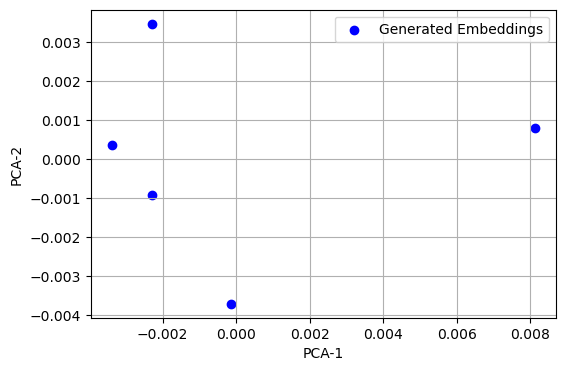

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(np.array(generated_embeddings))

plt.figure(figsize=(6, 4))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue', label='Generated Embeddings')
plt.title("")
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
all_results = []

for idx in range(0, len(X_seq_embedding), 100):  
    embedding_sample = X_seq_embedding[idx:idx+1]  

    # ÿ™ŸàŸÑ€åÿØ ÿ≥ŸÜÿßÿ±€åŸà
    noisy_input = embedding_sample + 0.1 * np.random.normal(size=embedding_sample.shape)
    repeated_noisy = np.repeat(noisy_input, 5, axis=0)
    repeated_cond = np.repeat(embedding_sample, 5, axis=0)

    # Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿ®ÿß ÿØ€åŸÅ€åŸà⁄òŸÜ
    generated_embeddings = diff_model.predict([repeated_noisy, repeated_cond])

    # Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿÆÿ±Ÿàÿ¨€å‚ÄåŸáÿß
    wave_pred, pv_pred, hours_pred = wave_classifier_model.predict(generated_embeddings)

    # ÿ¨ŸÖÿπ‚Äåÿ¢Ÿàÿ±€å
    for i in range(5):
        all_results.append({
            'index': idx,
            'scenario': i+1,
            'wave': int(np.argmax(wave_pred[i])),
            'pv': int(pv_pred[i] > 0.5),
            'hours_left': float(hours_pred[i]),
        })


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 367ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 166ms/step


C:\Users\amirhossein\AppData\Local\Temp\ipykernel_14380\110454569.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'pv': int(pv_pred[i] > 0.5),
C:\Users\amirhossein\AppData\Local\Temp\ipykernel_14380\110454569.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'hours_left': float(hours_pred[i]),


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 132ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 69ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 71ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 63ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 45ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 47ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 44ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 55ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 114ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 77ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 57ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 55ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [ ]:
import pandas as pd

# ÿ≥ÿßÿÆÿ™ ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿßÿ≤ ŸÑ€åÿ≥ÿ™ ÿØ€å⁄©ÿ¥ŸÜÿ±€å‚ÄåŸáÿß
df_results = pd.DataFrame(all_results)

# ŸÜŸÖÿß€åÿ¥ ⁄ÜŸÜÿØ ÿ±ÿØ€åŸÅ ÿßŸàŸÑ ÿ¨ÿØŸàŸÑ
print(df_results.head())


   index  scenario  wave  pv  hours_left
0      0         1     1   0   -0.001124
1      0         2     1   0   -0.001124
2      0         3     1   0   -0.001124
3      0         4     1   0   -0.001124
4      0         5     1   0   -0.001124


In [ ]:
num_samples = 5   # ÿ™ÿπÿØÿßÿØ ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß€å€å ⁄©Ÿá ŸÖ€å‚ÄåÿÆŸàÿß€å ÿ®ÿ±ÿ±ÿ≥€å ⁄©ŸÜ€å
num_scenarios = 5 # ÿ™ÿπÿØÿßÿØ ÿ≥ŸÜÿßÿ±€åŸà ÿ®ÿ±ÿß€å Ÿáÿ± ŸÜŸÖŸàŸÜŸá

results = []

for sample_idx in range(num_samples):
    original_embedding = X_seq_embedding[sample_idx]  # ÿßŸÜÿ™ÿÆÿßÿ® embedding ŸÜŸÖŸàŸÜŸá
    scenario_embeddings = []
    
    for _ in range(num_scenarios):
        noisy_embedding = original_embedding + noise_factor * np.random.normal(
            loc=0.0, scale=1.0, size=original_embedding.shape
        )
        scenario_embeddings.append(noisy_embedding)
    
    scenario_embeddings = np.array(scenario_embeddings)
    
    # Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿ®ÿß ŸÖÿØŸÑ ŸÖŸàÿ¨ (wave_classifier_model) €åÿß ŸÖÿØŸÑ‚ÄåŸáÿß€å ŸÖÿ±ÿ™ÿ®ÿ∑
    y_wave_pred, y_pv_pred, y_hours_pred = wave_classifier_model.predict(scenario_embeddings)
    
    for i in range(num_scenarios):
        wave_label = int(np.argmax(y_wave_pred[i]))
        pv_label = int(y_pv_pred[i] > 0.5)
        hours_left = float(y_hours_pred[i])
        
        results.append({
            "index": sample_idx,
            "scenario": i + 1,
            "wave": wave_label,
            "pv": pv_label,
            "hours_left": hours_left,
        })

import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 262ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 72ms/step


C:\Users\amirhossein\AppData\Local\Temp\ipykernel_14380\1380578877.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pv_label = int(y_pv_pred[i] > 0.5)
C:\Users\amirhossein\AppData\Local\Temp\ipykernel_14380\1380578877.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hours_left = float(y_hours_pred[i])


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 117ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 93ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 95ms/step
    index  scenario  wave  pv  hours_left
0       0         1     0   0   -0.000952
1       0         2     0   0   -0.001063
2       0         3     4   0    0.000114
3       0         4     1   1   -0.001584
4       0         5     1   1   -0.004657
5       1         1     0   1    0.002493
6       1         2     0   1   -0.001102
7       1         3     2   0    0.000432
8       1         4     4   0   -0.000315
9       1         5     0   0   -0.001200
10      2         1     1   0   -0.000009
11      2         2     0   1   -0.001337
12      2         3     1   0   -0.000254
13      2         4     0   1   -0.002646
14      2         5     1   0   -0.001124
15      3         1     4   0    0.000356
16      3         2     0   1    0.000804
17      3

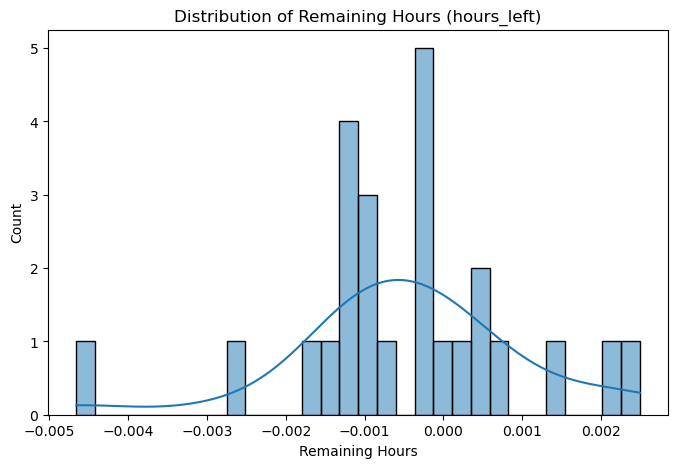

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_results['hours_left'], bins=30, kde=True)
plt.title('Distribution of Remaining Hours (hours_left)')
plt.xlabel('Remaining Hours')
plt.ylabel('Count')
plt.show()


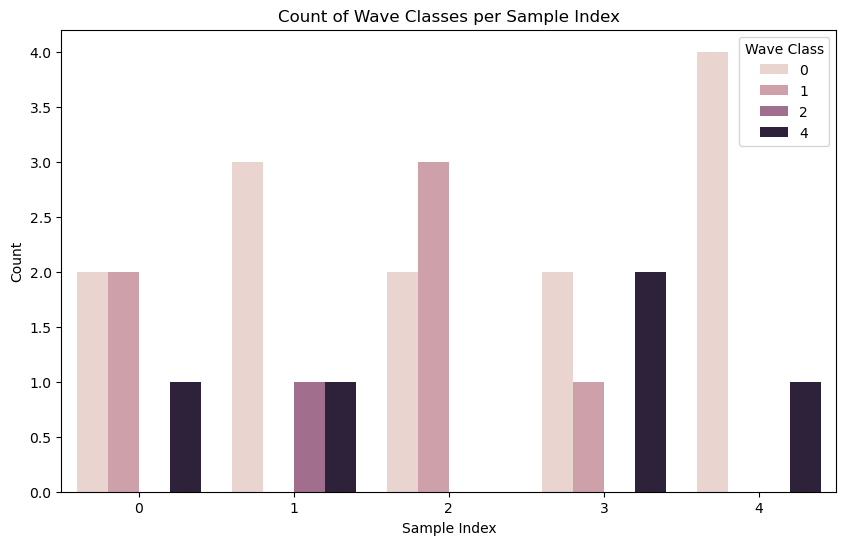

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_results, x='index', hue='wave')
plt.title('Count of Wave Classes per Sample Index')
plt.xlabel('Sample Index')
plt.ylabel('Count')
plt.legend(title='Wave Class')
plt.show()


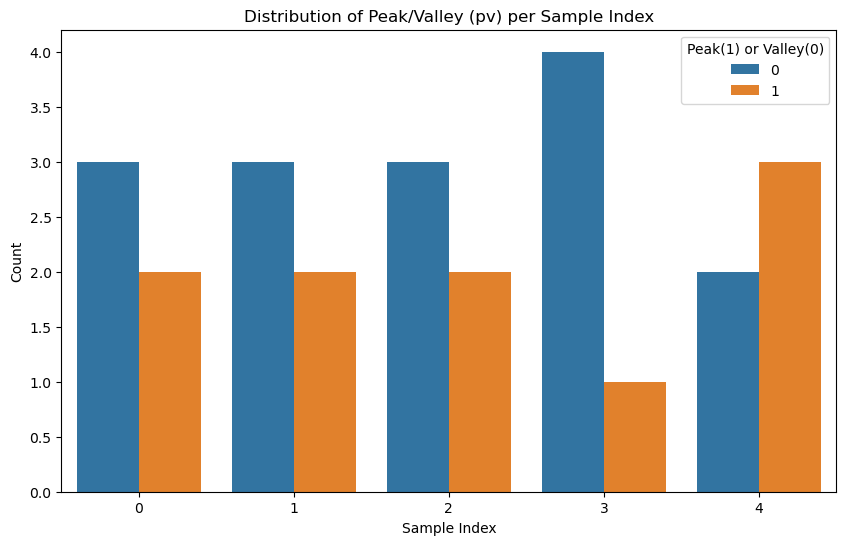

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_results, x='index', hue='pv')
plt.title('Distribution of Peak/Valley (pv) per Sample Index')
plt.xlabel('Sample Index')
plt.ylabel('Count')
plt.legend(title='Peak(1) or Valley(0)')
plt.show()


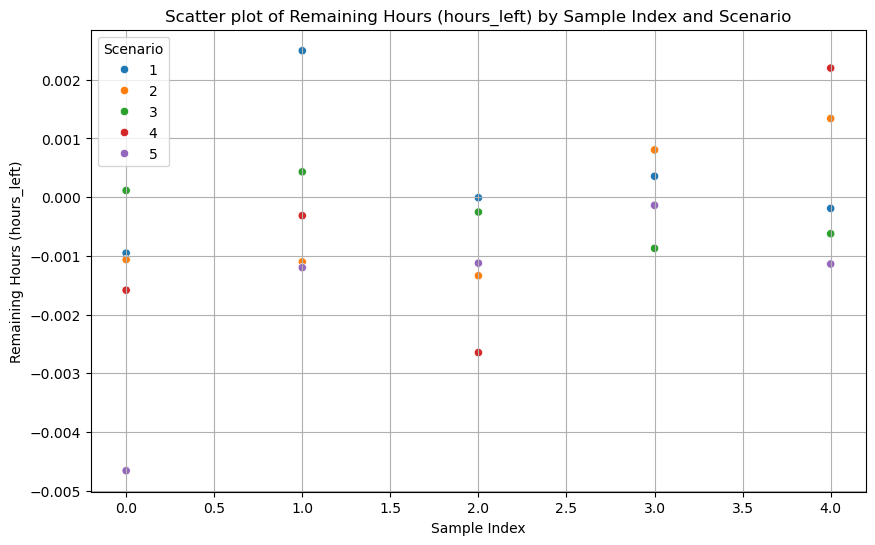

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_results, x='index', y='hours_left', hue='scenario', palette='tab10')
plt.title('Scatter plot of Remaining Hours (hours_left) by Sample Index and Scenario')
plt.xlabel('Sample Index')
plt.ylabel('Remaining Hours (hours_left)')
plt.legend(title='Scenario')
plt.grid(True)
plt.show()
